In [1]:
#object tracking with camshift algorithm
import numpy as np
import cv2

In [2]:
# initialize video from the webcam
video = cv2.VideoCapture(0)
# Read the video
cap, frame = video.read()

In [3]:
print(len(frame))

720


In [4]:
# set up initial coordinates for the tracking window
x, y = 0, 0
# Set up initial size of the tracking window
height, width = 25, 25
track_window = (x,y,width,height)
# set up region of interest (roi)
roi = frame[y:y + height, x:x + width]

In [ ]:
# apply mask
hsv_frame =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_frame, np.array((0, 20, 20)), np.array((180, 250, 250)))
hist_frame = cv2.calcHist([hsv_frame], [0], mask, [180], [0,180])
cv2.normalize(hist_frame, hist_frame, 0, 255, cv2.NORM_MINMAX)
# Setup the termination criteria: 10 iteration 1 pxl movement
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

In [ ]:
while True:
    cap, frame = video.read()
    if cap == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],hist_frame,[0,180],1)
        # apply camshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
         # Draw a box around the ROI
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        print(pts)
        img2 = cv2.polylines(frame,[pts],True, (255,255,255),2)
        cv2.imshow('img2',img2)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

[[ 31 -11]
 [ 64  31]
 [ 30  56]
 [ -2  13]]
[[ 24  79]
 [ 67  14]
 [112  43]
 [ 69 108]]
[[ 25  80]
 [ 82   1]
 [131  36]
 [ 74 115]]
[[ 61  76]
 [100 -13]
 [173  17]
 [134 107]]
[[ 65  29]
 [161 -20]
 [206  65]
 [110 115]]
[[ 97 -10]
 [234  18]
 [213 115]
 [ 76  86]]
[[ 90 -18]
 [253  20]
 [228 129]
 [ 65  90]]
[[ 75 -16]
 [257  18]
 [234 138]
 [ 52 103]]
[[ 54 -11]
 [256  12]
 [241 144]
 [ 39 120]]
[[ 52 -13]
 [261  15]
 [242 157]
 [ 33 128]]
[[ 58 -14]
 [268  16]
 [246 168]
 [ 36 137]]
[[ 58 -20]
 [269  22]
 [237 181]
 [ 26 138]]
[[ 61 -24]
 [273  27]
 [234 187]
 [ 22 135]]
[[ 57 -25]
 [278  28]
 [237 193]
 [ 16 139]]
[[ 60 -22]
 [277  24]
 [240 195]
 [ 23 148]]
[[ 79 -37]
 [287  39]
 [226 203]
 [ 18 126]]
[[ 70 -28]
 [279  30]
 [234 191]
 [ 25 132]]
[[ 60 -21]
 [270  23]
 [235 190]
 [ 25 145]]
[[ 58 -27]
 [276  29]
 [232 197]
 [ 14 140]]
[[ 56 -21]
 [272  23]
 [237 196]
 [ 21 151]]
[[ 37   0]
 [252   1]
 [251 187]
 [ 36 186]]
[[118 -57]
 [292  58]
 [184 220]
 [ 10 104]]
[[ 95 -42]

[[-17 187]
 [ 79 -46]
 [306  48]
 [209 282]]
[[ 15 241]
 [ 40 -11]
 [281  12]
 [256 265]]
[[ -7  32]
 [234 -30]
 [296 209]
 [ 54 272]]
[[261  -6]
 [277 249]
 [ 31 264]
 [ 15   8]]
[[-19 180]
 [ 91 -52]
 [313  53]
 [202 286]]
[[ 33 257]
 [ 34   0]
 [266   1]
 [265 258]]
[[ 20 250]
 [ 31  -4]
 [276   6]
 [265 261]]
[[-16 194]
 [ 79 -45]
 [310  47]
 [214 287]]
[[  1 229]
 [ 52 -23]
 [291  25]
 [240 278]]
[[ 19 253]
 [ 28  -3]
 [273   5]
 [264 262]]
[[-11 207]
 [ 77 -40]
 [307  42]
 [218 290]]
[[ 15 245]
 [ 40 -10]
 [282  12]
 [257 268]]
[[-22 172]
 [108 -58]
 [319  60]
 [188 291]]
[[252 -11]
 [282 248]
 [ 65 273]
 [ 35  13]]
[[264  -3]
 [274 256]
 [ 48 265]
 [ 38   5]]
[[ 22 245]
 [ 45  -9]
 [282  11]
 [259 266]]
[[-25 124]
 [142 -72]
 [326  84]
 [158 281]]
[[184 -47]
 [309 150]
 [154 247]
 [ 29  49]]
[[226 -24]
 [293 196]
 [128 246]
 [ 61  25]]
[[254  -5]
 [273 253]
 [ 89 266]
 [ 70   7]]
[[266   1]
 [267 268]
 [ 65 268]
 [ 64   1]]
[[ 49 264]
 [ 54  -1]
 [272   3]
 [267 269]]
[[265  -5]

[[590 223]
 [673 -21]
 [805  23]
 [722 268]]
[[593 226]
 [677 -20]
 [806  22]
 [722 269]]
[[597 222]
 [678 -20]
 [805  22]
 [724 265]]
[[600 216]
 [679 -19]
 [805  22]
 [726 258]]
[[601 213]
 [682 -20]
 [809  22]
 [728 256]]
[[600 221]
 [677 -19]
 [806  21]
 [729 262]]
[[600 227]
 [679 -19]
 [805  21]
 [726 268]]
[[603 222]
 [683 -19]
 [806  21]
 [726 263]]
[[603 220]
 [683 -19]
 [807  21]
 [727 261]]
[[602 229]
 [680 -18]
 [803  20]
 [725 268]]
[[603 227]
 [680 -18]
 [804  20]
 [727 266]]
[[603 228]
 [683 -18]
 [805  20]
 [725 267]]
[[605 219]
 [681 -18]
 [804  20]
 [728 258]]
[[604 221]
 [677 -18]
 [803  20]
 [730 260]]
[[601 230]
 [676 -17]
 [802  19]
 [727 267]]
[[602 223]
 [682 -19]
 [805  21]
 [725 264]]
[[603 226]
 [683 -19]
 [807  20]
 [727 266]]
[[603 218]
 [686 -20]
 [808  21]
 [725 260]]
[[606 217]
 [689 -19]
 [809  21]
 [726 258]]
[[607 228]
 [679 -16]
 [799  18]
 [727 263]]
[[603 227]
 [680 -18]
 [803  20]
 [726 266]]
[[604 225]
 [679 -17]
 [802  19]
 [727 262]]
[[604 235]

[[1093    9]
 [1222  258]
 [1012  367]
 [ 883  118]]
[[1099   14]
 [1210  269]
 [ 998  362]
 [ 887  107]]
[[1095   10]
 [1220  261]
 [1009  366]
 [ 884  115]]
[[1097   11]
 [1214  263]
 [1002  361]
 [ 885  109]]
[[1102   12]
 [1215  266]
 [1000  361]
 [ 887  107]]
[[1103   10]
 [1218  266]
 [1001  364]
 [ 886  108]]
[[1094    9]
 [1220  261]
 [1009  366]
 [ 883  114]]
[[1104   10]
 [1214  268]
 [ 998  361]
 [ 888  103]]
[[1099    8]
 [1224  258]
 [1009  365]
 [ 884  115]]
[[1095    9]
 [1222  259]
 [1010  366]
 [ 883  116]]
[[1098   10]
 [1219  261]
 [1006  364]
 [ 885  113]]
[[1107   11]
 [1219  267]
 [1000  363]
 [ 888  107]]
[[1095    7]
 [1224  255]
 [1012  366]
 [ 883  118]]
[[1105   10]
 [1218  265]
 [1001  362]
 [ 888  107]]
[[1093    7]
 [1224  255]
 [1013  367]
 [ 882  119]]
[[1101   10]
 [1218  264]
 [1004  363]
 [ 887  109]]
[[1095   10]
 [1222  256]
 [1012  363]
 [ 885  117]]
[[1109   13]
 [1218  268]
 [ 999  361]
 [ 890  106]]
[[1096    7]
 [1227  256]
 [1014  368]
 [ 883 

[[1140  -69]
 [1305  305]
 [ 985  446]
 [ 820   71]]
[[1149  -67]
 [1308  312]
 [ 983  449]
 [ 824   69]]
[[1151  -66]
 [1308  315]
 [ 983  449]
 [ 826   67]]
[[1164  -58]
 [1301  323]
 [ 970  442]
 [ 833   60]]
[[1138  -70]
 [1313  297]
 [ 995  448]
 [ 820   80]]
[[1155  -62]
 [1301  314]
 [ 976  441]
 [ 830   64]]
[[1144  -71]
 [1309  292]
 [ 989  437]
 [ 824   73]]
[[1151  -67]
 [1308  299]
 [ 987  436]
 [ 830   69]]
[[1141  -75]
 [1314  277]
 [1001  430]
 [ 828   77]]
[[1104  -83]
 [1321  233]
 [1041  426]
 [ 824  109]]
[[1175  -39]
 [1268  317]
 [ 953  398]
 [ 860   41]]
[[1091  -87]
 [1328  204]
 [1066  418]
 [ 829  126]]
[[1165  -35]
 [1248  303]
 [ 954  376]
 [ 871   37]]
[[1112  -83]
 [1317  217]
 [1045  402]
 [ 840  101]]
[[1154  -58]
 [1287  269]
 [ 994  388]
 [ 861   60]]
[[1073  -86]
 [1324  168]
 [1093  395]
 [ 842  140]]
[[1185  -22]
 [1234  284]
 [ 940  331]
 [ 891   24]]
[[1010  -77]
 [1317   95]
 [1162  372]
 [ 855  199]]
[[ 974  -60]
 [1305   62]
 [1196  353]
 [ 865 

[[  1   0]
 [305   2]
 [304 213]
 [  0 211]]
[[  4   0]
 [303   0]
 [303 213]
 [  4 213]]
[[ 11   4]
 [306  -2]
 [311 207]
 [ 16 214]]
[[ 19   0]
 [311   0]
 [311 211]
 [ 19 211]]
[[ 26  -3]
 [315   5]
 [308 214]
 [ 19 205]]
[[ 25   1]
 [314   0]
 [315 207]
 [ 26 208]]
[[ 29  -2]
 [318   4]
 [313 212]
 [ 24 205]]
[[ 29   0]
 [316   2]
 [315 211]
 [ 28 209]]
[[ 29   1]
 [317   0]
 [318 210]
 [ 30 211]]
[[ 29   2]
 [319   0]
 [321 211]
 [ 31 214]]
[[ 29   2]
 [317   0]
 [320 215]
 [ 32 218]]
[[ 30   2]
 [316   0]
 [317 217]
 [ 31 219]]
[[ 31   1]
 [315   0]
 [316 218]
 [ 32 219]]
[[ 27   7]
 [317  -5]
 [326 210]
 [ 36 223]]
[[ 27   6]
 [318  -3]
 [325 208]
 [ 34 218]]
[[ 33   0]
 [323   2]
 [320 217]
 [ 30 214]]
[[ 28   4]
 [316  -3]
 [323 213]
 [ 35 221]]
[[ 31   2]
 [315   0]
 [316 216]
 [ 32 218]]
[[ 28   6]
 [318  -4]
 [326 210]
 [ 36 221]]
[[ 31   2]
 [319   0]
 [320 218]
 [ 32 221]]
[[ 30   2]
 [320   0]
 [322 216]
 [ 32 219]]
[[ 28   3]
 [319   0]
 [322 216]
 [ 31 220]]
[[ 33  -1]

[[ 27   7]
 [322  -6]
 [333 211]
 [ 38 225]]
[[ 23  15]
 [317 -13]
 [338 203]
 [ 44 232]]
[[ 20  15]
 [313 -13]
 [335 201]
 [ 42 230]]
[[ 21  16]
 [314 -13]
 [337 202]
 [ 44 232]]
[[ 27   7]
 [321  -5]
 [330 213]
 [ 36 226]]
[[ 25  12]
 [318 -10]
 [335 206]
 [ 42 229]]
[[ 28  10]
 [316  -8]
 [330 207]
 [ 42 226]]
[[ 34  -1]
 [319   3]
 [316 221]
 [ 31 216]]
[[ 37  -2]
 [318   5]
 [312 225]
 [ 31 217]]
[[ 25  13]
 [302 -11]
 [322 205]
 [ 45 230]]
[[ 35   0]
 [319   2]
 [316 221]
 [ 32 218]]
[[ 29   7]
 [315  -5]
 [324 212]
 [ 38 225]]
[[ 26  10]
 [312  -8]
 [327 208]
 [ 41 227]]
[[ 32   1]
 [320   0]
 [320 220]
 [ 32 221]]
[[ 26  13]
 [313 -11]
 [332 205]
 [ 45 230]]
[[ 27   8]
 [315  -5]
 [326 211]
 [ 38 225]]
[[ 25  16]
 [314 -14]
 [337 200]
 [ 48 231]]
[[ 26   8]
 [318  -6]
 [329 210]
 [ 37 225]]
[[ 29   5]
 [316  -3]
 [323 212]
 [ 36 221]]
[[ 26   8]
 [314  -6]
 [325 211]
 [ 37 226]]
[[ 26   7]
 [321  -5]
 [332 212]
 [ 37 225]]
[[ 19  20]
 [309 -18]
 [338 196]
 [ 48 235]]
[[ 23  14]

[[ 28   6]
 [310  -5]
 [319 213]
 [ 37 225]]
[[ 30   4]
 [314  -1]
 [319 213]
 [ 35 219]]
[[ 31   7]
 [313  -4]
 [322 212]
 [ 40 224]]
[[ 29   7]
 [313  -5]
 [323 210]
 [ 39 223]]
[[ 26  10]
 [311  -9]
 [326 206]
 [ 41 226]]
[[ 29   6]
 [310  -3]
 [318 213]
 [ 37 223]]
[[ 34   1]
 [314   0]
 [315 217]
 [ 35 218]]
[[ 33   2]
 [316   0]
 [319 220]
 [ 36 223]]
[[ 32   3]
 [314  -2]
 [319 212]
 [ 37 218]]
[[ 35   2]
 [312   0]
 [315 213]
 [ 38 216]]
[[ 36   1]
 [311   0]
 [312 215]
 [ 37 216]]
[[ 33   2]
 [309   0]
 [312 213]
 [ 36 216]]
[[ 31   7]
 [311  -4]
 [320 212]
 [ 40 224]]
[[ 33   2]
 [314   0]
 [317 215]
 [ 36 218]]
[[ 29   6]
 [311  -5]
 [320 210]
 [ 38 222]]
[[ 32   3]
 [313  -2]
 [318 214]
 [ 37 220]]
[[ 29   6]
 [311  -4]
 [320 211]
 [ 38 222]]
[[ 29  10]
 [308  -8]
 [323 204]
 [ 44 223]]
[[ 27   8]
 [312  -6]
 [324 213]
 [ 39 228]]
[[ 25  11]
 [307  -9]
 [323 207]
 [ 41 228]]
[[ 27   9]
 [313  -7]
 [326 210]
 [ 40 227]]
[[ 28   7]
 [314  -5]
 [323 209]
 [ 37 222]]
[[ 29   7]

[[ 26   9]
 [325  -7]
 [338 209]
 [ 39 226]]
[[ 29   4]
 [324  -2]
 [329 214]
 [ 34 221]]
[[ 25   9]
 [320  -7]
 [332 211]
 [ 37 228]]
[[ 28   6]
 [324  -4]
 [332 214]
 [ 36 225]]
[[ 22  12]
 [321 -10]
 [338 205]
 [ 39 228]]
[[ 21  13]
 [324 -11]
 [342 207]
 [ 39 232]]
[[ 23   7]
 [329  -6]
 [340 213]
 [ 34 227]]
[[ 25   5]
 [333  -3]
 [340 216]
 [ 32 225]]
[[ 21  13]
 [333 -12]
 [351 205]
 [ 39 231]]
[[ 22  11]
 [339  -9]
 [354 209]
 [ 37 230]]
[[ 22   8]
 [336  -6]
 [347 214]
 [ 33 229]]
[[ 22   5]
 [339  -3]
 [346 216]
 [ 29 225]]
[[ 22   8]
 [335  -6]
 [346 216]
 [ 33 231]]
[[ 22   8]
 [338  -6]
 [349 214]
 [ 33 229]]
[[ 22  11]
 [335  -8]
 [350 211]
 [ 37 231]]
[[ 28   2]
 [338   0]
 [340 222]
 [ 30 225]]
[[ 22   6]
 [339  -4]
 [348 220]
 [ 31 231]]
[[ 20  13]
 [334 -11]
 [353 211]
 [ 39 236]]
[[ 22   9]
 [340  -7]
 [351 212]
 [ 33 229]]
[[ 23   6]
 [339  -4]
 [347 215]
 [ 31 226]]
[[ 25   6]
 [342  -4]
 [350 218]
 [ 33 229]]
[[ 23   5]
 [340  -3]
 [346 218]
 [ 29 227]]
[[ 22   9]

[[ 25   4]
 [345  -1]
 [350 224]
 [ 30 230]]
[[ 27   2]
 [347   0]
 [350 228]
 [ 30 231]]
[[ 28   0]
 [351   2]
 [350 228]
 [ 27 226]]
[[ 26   3]
 [346  -1]
 [351 225]
 [ 31 230]]
[[ 30   0]
 [349   2]
 [347 232]
 [ 28 229]]
[[ 22   8]
 [343  -6]
 [354 220]
 [ 33 235]]
[[ 25   4]
 [343  -2]
 [348 225]
 [ 30 232]]
[[ 26   3]
 [346  -1]
 [350 224]
 [ 30 229]]
[[ 30  -2]
 [348   4]
 [343 232]
 [ 25 225]]
[[ 25   4]
 [345  -3]
 [351 221]
 [ 31 229]]
[[ 26   5]
 [340  -4]
 [347 224]
 [ 33 234]]
[[ 29   1]
 [345   0]
 [346 224]
 [ 30 226]]
[[ 29   0]
 [343   1]
 [343 225]
 [ 29 224]]
[[ 31   0]
 [344   1]
 [343 228]
 [ 30 227]]
[[ 22  12]
 [337  -9]
 [353 215]
 [ 38 237]]
[[ 27   2]
 [341  -1]
 [344 224]
 [ 30 228]]
[[ 26   1]
 [344   0]
 [345 227]
 [ 27 228]]
[[ 26   5]
 [344  -3]
 [350 223]
 [ 32 232]]
[[ 27   3]
 [342  -1]
 [346 223]
 [ 31 228]]
[[ 28   3]
 [343  -1]
 [346 225]
 [ 31 230]]
[[ 27   3]
 [345   0]
 [348 226]
 [ 30 230]]
[[ 24   8]
 [341  -6]
 [352 219]
 [ 35 234]]
[[ 25   4]

[[ 27   9]
 [318  -7]
 [331 209]
 [ 40 226]]
[[ 25  11]
 [320  -8]
 [335 208]
 [ 40 228]]
[[ 27   9]
 [323  -7]
 [336 210]
 [ 40 227]]
[[ 29   5]
 [325  -2]
 [331 217]
 [ 35 225]]
[[ 25   8]
 [322  -6]
 [333 212]
 [ 36 227]]
[[ 23  14]
 [316 -13]
 [337 203]
 [ 44 231]]
[[ 30   1]
 [324   0]
 [325 217]
 [ 31 219]]
[[ 27   7]
 [320  -5]
 [330 211]
 [ 37 224]]
[[ 27   8]
 [319  -6]
 [330 212]
 [ 38 227]]
[[ 24  13]
 [319 -10]
 [337 205]
 [ 42 229]]
[[ 32   3]
 [325  -1]
 [329 217]
 [ 36 222]]
[[ 24  11]
 [318  -9]
 [333 207]
 [ 39 228]]
[[ 24  11]
 [314  -9]
 [329 208]
 [ 39 229]]
[[ 27   8]
 [317  -6]
 [328 209]
 [ 38 224]]
[[ 32   1]
 [323   0]
 [324 220]
 [ 33 221]]
[[ 28   5]
 [317  -3]
 [324 214]
 [ 35 223]]
[[ 33  -2]
 [317   4]
 [312 224]
 [ 28 217]]
[[ 23   9]
 [315  -7]
 [328 211]
 [ 36 228]]
[[ 26   9]
 [316  -7]
 [328 210]
 [ 38 227]]
[[ 25   9]
 [317  -7]
 [330 213]
 [ 38 230]]
[[ 28   5]
 [320  -3]
 [327 214]
 [ 35 223]]
[[ 28   4]
 [326  -2]
 [331 214]
 [ 33 221]]
[[ 20  14]

[[151  -9]
 [327  11]
 [315 113]
 [139  92]]
[[131   1]
 [324   0]
 [325  98]
 [132  99]]
[[130   5]
 [337  -3]
 [342 108]
 [135 117]]
[[125   3]
 [344   0]
 [346 108]
 [127 112]]
[[118 -10]
 [335  12]
 [324 118]
 [107  95]]
[[118  -4]
 [329   6]
 [324 107]
 [113  96]]
[[ 89 -10]
 [318  12]
 [307 115]
 [ 78  92]]
[[ 81 -10]
 [325  13]
 [315 115]
 [ 71  91]]
[[ 85   3]
 [323  -1]
 [325 105]
 [ 87 110]]
[[ 83  -5]
 [325   7]
 [320 112]
 [ 78  99]]
[[ 79 -11]
 [323  13]
 [312 114]
 [ 68  89]]
[[ 73  -4]
 [324   6]
 [320 106]
 [ 69  95]]
[[ 83 -18]
 [330  20]
 [314 121]
 [ 67  82]]
[[ 95  -8]
 [309  10]
 [300 112]
 [ 86  93]]
[[ 97 -18]
 [309  20]
 [290 122]
 [ 78  83]]
[[ 81 -11]
 [308  13]
 [297 119]
 [ 70  94]]
[[ 81  -9]
 [306  10]
 [297 115]
 [ 72  95]]
[[ 73 -14]
 [298  16]
 [283 119]
 [ 58  88]]
[[ 71  -5]
 [306   8]
 [300 102]
 [ 65  88]]
[[ 82  -3]
 [307   5]
 [304  83]
 [ 79  74]]
[[ 74  -3]
 [294   6]
 [291  67]
 [ 71  57]]
[[ 69  -2]
 [304   4]
 [303  32]
 [ 68  25]]
[[ 97   0]

[[196  -1]
 [207 386]
 [  6 391]
 [ -4   3]]
[[206  -4]
 [226 380]
 [ 10 391]
 [ -9   6]]
[[193  -8]
 [228 381]
 [ 18 400]
 [-16  10]]
[[203  -2]
 [217 393]
 [  7 400]
 [ -6   4]]
[[195  -5]
 [221 393]
 [ 13 406]
 [-12   7]]
[[189  -9]
 [228 380]
 [ 20 401]
 [-18  11]]
[[210  -4]
 [230 398]
 [ 11 409]
 [ -8   6]]
[[214  -3]
 [229 384]
 [  8 393]
 [ -6   5]]
[[202  -6]
 [229 380]
 [ 14 395]
 [-12   8]]
[[188  -6]
 [218 380]
 [ 16 395]
 [-13   8]]
[[190  -7]
 [219 370]
 [ 15 387]
 [-13   9]]
[[201  -7]
 [234 371]
 [ 17 389]
 [-15  10]]
[[202  -8]
 [237 382]
 [ 18 401]
 [-16  10]]
[[211  -2]
 [224 379]
 [  7 386]
 [ -5   4]]
[[201  -7]
 [230 377]
 [ 15 394]
 [-13   9]]
[[198  -2]
 [213 387]
 [  8 395]
 [ -6   5]]
[[217  -6]
 [242 384]
 [ 13 399]
 [-11   8]]
[[ -6 376]
 [  8  -3]
 [248   6]
 [233 386]]
[[243   0]
 [244 377]
 [  1 378]
 [  0   1]]
[[236  -2]
 [247 372]
 [  6 379]
 [ -4   4]]
[[240   0]
 [245 379]
 [  3 382]
 [ -1   2]]
[[236  -2]
 [249 379]
 [  7 387]
 [ -5   5]]
[[ -2 373]

[[576 164]
 [753 -78]
 [971  80]
 [794 323]]
[[596 232]
 [683 -39]
 [933  41]
 [846 313]]
[[568 179]
 [749 -78]
 [975  80]
 [794 338]]
[[580 203]
 [711 -59]
 [950  60]
 [819 323]]
[[569 156]
 [750 -81]
 [967  83]
 [786 321]]
[[584 173]
 [733 -67]
 [954  69]
 [805 310]]
[[578 186]
 [721 -63]
 [945  65]
 [802 315]]
[[576 173]
 [741 -71]
 [957  73]
 [792 318]]
[[591 210]
 [707 -51]
 [944  53]
 [828 315]]
[[568 185]
 [733 -71]
 [959  73]
 [794 330]]
[[596 252]
 [671 -32]
 [925  34]
 [850 319]]
[[566 167]
 [767 -86]
 [987  88]
 [786 342]]
[[601 193]
 [757 -64]
 [973  66]
 [817 324]]
[[594 218]
 [723 -54]
 [955  55]
 [826 328]]
[[577 197]
 [739 -69]
 [970  71]
 [808 338]]
[[581 208]
 [724 -62]
 [965  64]
 [822 335]]
[[579 208]
 [725 -63]
 [964  65]
 [818 337]]
[[574 181]
 [747 -74]
 [972  76]
 [799 332]]
[[583 213]
 [706 -53]
 [945  56]
 [822 323]]
[[568 160]
 [757 -82]
 [972  84]
 [783 327]]
[[590 197]
 [722 -57]
 [949  59]
 [817 314]]
[[589 233]
 [692 -44]
 [937  46]
 [834 324]]
[[574 213]

[[ 95  75]
 [118 321]
 [ 12 331]
 [-10  85]]
[[ 87  83]
 [111 314]
 [ 13 325]
 [-10  94]]
[[ 93  86]
 [107 319]
 [  8 325]
 [ -5  92]]
[[ 94  91]
 [117 335]
 [ 12 345]
 [-10 101]]
[[ 92 105]
 [109 343]
 [  9 350]
 [ -7 112]]
[[ 87 112]
 [104 351]
 [  9 358]
 [ -7 119]]
[[ 81 112]
 [106 354]
 [ 13 363]
 [-11 121]]
[[ 78 113]
 [105 361]
 [ 14 371]
 [-12 123]]
[[ 95 120]
 [116 369]
 [ 11 378]
 [ -9 129]]
[[116 122]
 [121 371]
 [  3 374]
 [ -1 125]]
[[  0 381]
 [  3 127]
 [133 129]
 [129 383]]
[[-21 367]
 [ 23  92]
 [180 117]
 [135 392]]
[[-25 359]
 [ 27  87]
 [191 119]
 [138 391]]
[[-68 313]
 [ 70  24]
 [232 103]
 [ 93 392]]
[[-67 352]
 [ 68   6]
 [239  73]
 [103 419]]
[[-49 372]
 [ 51   2]
 [257  58]
 [156 428]]
[[-55 360]
 [ 57 -15]
 [305  59]
 [192 435]]
[[-73 368]
 [ 76 -20]
 [315  72]
 [165 461]]
[[-98 399]
 [100 -49]
 [328  51]
 [129 500]]
[[-66 407]
 [ 69 -35]
 [308  37]
 [172 480]]
[[-81 366]
 [ 83  -1]
 [288  89]
 [123 457]]
[[-67 346]
 [ 69  54]
 [227 127]
 [ 90 419]]
[[133 142]

[[127 -23]
 [204 221]
 [ 48 270]
 [-28  25]]
[[118 -30]
 [213 211]
 [ 52 274]
 [-42  32]]
[[127 -30]
 [216 202]
 [ 48 266]
 [-40  33]]
[[123 -30]
 [213 209]
 [ 47 271]
 [-42  31]]
[[134 -30]
 [219 205]
 [ 45 268]
 [-39  32]]
[[117 -41]
 [232 183]
 [ 64 268]
 [-50  43]]
[[126 -34]
 [221 195]
 [ 49 266]
 [-45  36]]
[[123 -36]
 [224 187]
 [ 56 263]
 [-44  39]]
[[117 -34]
 [218 203]
 [ 52 274]
 [-48  36]]
[[133 -29]
 [221 215]
 [ 48 276]
 [-39  31]]
[[129 -30]
 [218 211]
 [ 46 274]
 [-42  32]]
[[127 -35]
 [224 192]
 [ 51 265]
 [-45  37]]
[[121 -36]
 [225 198]
 [ 58 273]
 [-45  38]]
[[133 -32]
 [222 203]
 [ 45 270]
 [-43  34]]
[[119 -37]
 [228 196]
 [ 62 273]
 [-46  39]]
[[130 -28]
 [213 216]
 [ 42 274]
 [-40  29]]
[[122 -32]
 [215 203]
 [ 47 270]
 [-45  34]]
[[124 -31]
 [219 212]
 [ 52 277]
 [-42  33]]
[[128 -29]
 [217 213]
 [ 46 275]
 [-42  32]]
[[130 -30]
 [217 208]
 [ 45 271]
 [-41  32]]
[[135 -29]
 [218 213]
 [ 42 274]
 [-40  31]]
[[135 -31]
 [222 205]
 [ 44 270]
 [-42  33]]
[[135 -29]

[[286   0]
 [289 339]
 [114 340]
 [111   1]]
[[106 338]
 [111   0]
 [289   2]
 [284 341]]
[[285   0]
 [286 342]
 [101 343]
 [100   1]]
[[ 80 341]
 [ 83   0]
 [271   1]
 [268 342]]
[[ 50 342]
 [ 57  -1]
 [248   2]
 [241 346]]
[[ 35 348]
 [ 38   0]
 [236   1]
 [233 349]]
[[193  11]
 [195 353]
 [  1 354]
 [  0  12]]
[[158   4]
 [201 353]
 [ 22 375]
 [-20  26]]
[[140  22]
 [185 379]
 [ 23 400]
 [-21  43]]
[[120  41]
 [167 394]
 [ 24 413]
 [-22  60]]
[[113  79]
 [147 401]
 [ 18 414]
 [-15  92]]
[[114 104]
 [144 402]
 [ 16 415]
 [-13 117]]
[[118 120]
 [141 402]
 [ 12 413]
 [-10 131]]
[[123 113]
 [144 409]
 [ 11 418]
 [ -9 122]]
[[127 136]
 [134 407]
 [  4 410]
 [ -2 139]]
[[116 114]
 [134 403]
 [  9 411]
 [ -8 122]]
[[116 122]
 [131 418]
 [  8 425]
 [ -6 129]]
[[118 133]
 [119 421]
 [  1 422]
 [  0 134]]
[[114 153]
 [129 421]
 [  8 428]
 [ -6 160]]
[[117 151]
 [130 427]
 [  7 432]
 [ -5 156]]
[[ -6 432]
 [  8 167]
 [127 174]
 [112 439]]
[[  0 439]
 [  1 160]
 [119 161]
 [118 440]]
[[  0 434]

[[189 -20]
 [246 260]
 [ 29 303]
 [-27  22]]
[[183 -25]
 [252 263]
 [ 35 316]
 [-33  27]]
[[180 -22]
 [244 265]
 [ 33 312]
 [-30  24]]
[[174 -26]
 [245 247]
 [ 36 302]
 [-34  28]]
[[185 -21]
 [245 260]
 [ 30 305]
 [-29  23]]
[[180 -21]
 [242 267]
 [ 32 312]
 [-29  23]]
[[189 -17]
 [237 260]
 [ 25 297]
 [-22  19]]
[[150 -36]
 [253 233]
 [ 52 309]
 [-50  39]]
[[185 -20]
 [242 260]
 [ 29 303]
 [-27  22]]
[[172 -29]
 [251 243]
 [ 40 304]
 [-38  31]]
[[189 -22]
 [249 253]
 [ 31 300]
 [-28  24]]
[[181 -22]
 [244 257]
 [ 32 305]
 [-30  25]]
[[169 -25]
 [241 255]
 [ 36 307]
 [-35  26]]
[[180 -22]
 [243 260]
 [ 32 307]
 [-30  24]]
[[180 -24]
 [247 258]
 [ 34 309]
 [-32  26]]
[[182 -24]
 [248 254]
 [ 34 305]
 [-31  26]]
[[178 -24]
 [245 256]
 [ 34 307]
 [-32  26]]
[[171 -29]
 [250 246]
 [ 40 307]
 [-38  31]]
[[175 -23]
 [242 257]
 [ 34 306]
 [-32  25]]
[[174 -25]
 [244 249]
 [ 36 302]
 [-33  27]]
[[161 -32]
 [250 241]
 [ 45 308]
 [-43  34]]
[[168 -27]
 [247 252]
 [ 40 310]
 [-38  30]]
[[183 -20]

[[129 396]
 [311 377]
 [326 516]
 [144 535]]
[[121 400]
 [302 369]
 [325 502]
 [144 533]]
[[118 399]
 [300 368]
 [323 502]
 [141 533]]
[[113 413]
 [292 364]
 [325 488]
 [146 537]]
[[118 412]
 [291 367]
 [322 485]
 [149 530]]
[[115 412]
 [297 369]
 [324 487]
 [142 530]]
[[114 403]
 [305 371]
 [326 492]
 [135 524]]
[[120 407]
 [301 369]
 [326 492]
 [145 530]]
[[122 406]
 [301 365]
 [328 481]
 [149 522]]
[[121 409]
 [297 368]
 [324 485]
 [148 526]]
[[129 398]
 [309 377]
 [323 498]
 [143 519]]
[[117 405]
 [303 369]
 [326 493]
 [140 529]]
[[123 392]
 [309 372]
 [324 509]
 [138 529]]
[[126 395]
 [311 370]
 [330 506]
 [145 531]]
[[120 397]
 [303 368]
 [324 503]
 [141 532]]
[[122 401]
 [307 372]
 [328 505]
 [143 534]]
[[122 395]
 [307 371]
 [325 508]
 [140 532]]
[[119 403]
 [303 366]
 [332 504]
 [148 541]]
[[119 398]
 [306 371]
 [327 510]
 [140 537]]
[[118 409]
 [299 359]
 [336 496]
 [155 546]]
[[127 391]
 [310 378]
 [321 522]
 [138 535]]
[[118 406]
 [298 361]
 [333 505]
 [153 550]]
[[130 382]

[[130 383]
 [318 376]
 [323 541]
 [135 548]]
[[113 405]
 [300 360]
 [337 516]
 [150 561]]
[[120 395]
 [303 364]
 [330 525]
 [147 556]]
[[109 410]
 [293 358]
 [338 515]
 [154 567]]
[[118 395]
 [306 368]
 [329 529]
 [141 556]]
[[125 383]
 [316 375]
 [323 542]
 [132 550]]
[[122 392]
 [311 369]
 [332 531]
 [143 554]]
[[108 417]
 [290 352]
 [345 507]
 [163 572]]
[[111 412]
 [289 355]
 [337 504]
 [159 561]]
[[116 401]
 [301 364]
 [332 518]
 [147 555]]
[[121 396]
 [312 372]
 [332 528]
 [141 552]]
[[117 397]
 [305 366]
 [330 522]
 [142 553]]
[[117 399]
 [308 367]
 [335 523]
 [144 555]]
[[116 401]
 [302 364]
 [333 520]
 [147 557]]
[[114 399]
 [301 364]
 [332 526]
 [145 561]]
[[109 414]
 [286 354]
 [341 514]
 [164 574]]
[[110 407]
 [297 360]
 [336 515]
 [149 562]]
[[113 403]
 [297 360]
 [334 517]
 [150 560]]
[[105 414]
 [288 351]
 [343 510]
 [160 573]]
[[109 415]
 [285 354]
 [340 511]
 [164 572]]
[[120 392]
 [309 369]
 [328 530]
 [139 553]]
[[126 389]
 [315 374]
 [328 537]
 [139 552]]
[[116 396]

[[120 395]
 [306 373]
 [324 522]
 [138 544]]
[[110 413]
 [290 358]
 [335 505]
 [155 560]]
[[121 401]
 [302 368]
 [329 515]
 [148 548]]
[[124 389]
 [315 374]
 [327 528]
 [136 543]]
[[118 399]
 [299 368]
 [326 522]
 [145 553]]
[[114 413]
 [286 358]
 [331 499]
 [159 554]]
[[113 417]
 [292 360]
 [334 489]
 [155 546]]
[[127 392]
 [311 377]
 [322 508]
 [138 523]]
[[119 403]
 [303 368]
 [330 504]
 [146 539]]
[[123 396]
 [306 371]
 [326 515]
 [143 540]]
[[124 392]
 [308 375]
 [321 519]
 [137 536]]
[[122 400]
 [302 369]
 [325 508]
 [145 539]]
[[126 392]
 [311 375]
 [324 520]
 [139 537]]
[[124 393]
 [308 371]
 [325 518]
 [141 540]]
[[122 402]
 [299 369]
 [326 512]
 [149 545]]
[[127 390]
 [313 373]
 [326 516]
 [140 533]]
[[115 415]
 [286 358]
 [329 488]
 [158 545]]
[[123 397]
 [303 376]
 [319 506]
 [139 527]]
[[125 397]
 [305 372]
 [323 500]
 [143 525]]
[[114 413]
 [298 364]
 [331 486]
 [147 535]]
[[125 396]
 [305 375]
 [321 509]
 [141 530]]
[[121 398]
 [304 369]
 [325 502]
 [142 531]]
[[121 398]

[[181 -21]
 [256 259]
 [ 83 305]
 [  8  24]]
[[177 -24]
 [261 252]
 [ 89 304]
 [  5  27]]
[[187 -20]
 [259 265]
 [ 87 308]
 [ 15  22]]
[[189 -20]
 [260 262]
 [ 90 305]
 [ 19  22]]
[[186 -23]
 [266 255]
 [ 94 304]
 [ 14  25]]
[[185 -26]
 [275 254]
 [107 308]
 [ 17  27]]
[[187 -24]
 [274 257]
 [109 308]
 [ 22  26]]
[[184 -23]
 [269 256]
 [107 305]
 [ 22  25]]
[[187 -21]
 [265 254]
 [102 300]
 [ 24  24]]
[[195 -20]
 [266 260]
 [ 98 302]
 [ 27  21]]
[[189 -22]
 [268 254]
 [102 301]
 [ 23  24]]
[[193 -22]
 [268 249]
 [ 97 296]
 [ 22  24]]
[[187 -26]
 [276 254]
 [105 309]
 [ 16  28]]
[[195 -23]
 [271 251]
 [ 95 300]
 [ 19  25]]
[[196 -24]
 [275 249]
 [ 98 300]
 [ 19  26]]
[[195 -22]
 [270 263]
 [ 89 310]
 [ 14  24]]
[[187 -27]
 [272 250]
 [ 83 308]
 [ -1  30]]
[[175 -33]
 [272 232]
 [ 81 302]
 [-15  36]]
[[175 -35]
 [276 231]
 [ 83 304]
 [-17  37]]
[[158 -42]
 [281 217]
 [ 97 304]
 [-25  44]]
[[168 -35]
 [273 226]
 [ 92 299]
 [-12  37]]
[[169 -35]
 [272 221]
 [ 88 294]
 [-14  37]]
[[169 -37]

[[118 -53]
 [258 170]
 [ 85 278]
 [-54  54]]
[[169 -34]
 [257 206]
 [ 66 276]
 [-21  35]]
[[126 -57]
 [271 166]
 [ 90 283]
 [-54  59]]
[[146 -46]
 [261 185]
 [ 71 280]
 [-43  48]]
[[139 -48]
 [267 185]
 [ 84 284]
 [-43  50]]
[[146 -43]
 [260 191]
 [ 79 279]
 [-34  44]]
[[167 -36]
 [262 206]
 [ 69 281]
 [-25  38]]
[[139 -52]
 [276 180]
 [ 95 287]
 [-41  54]]
[[160 -40]
 [271 208]
 [ 83 291]
 [-27  42]]
[[155 -44]
 [274 199]
 [ 89 289]
 [-29  45]]
[[164 -39]
 [270 210]
 [ 80 291]
 [-25  41]]
[[136 -53]
 [277 178]
 [ 97 287]
 [-43  55]]
[[165 -38]
 [266 205]
 [ 75 284]
 [-25  40]]
[[151 -46]
 [275 197]
 [ 92 291]
 [-31  47]]
[[137 -47]
 [266 190]
 [ 87 287]
 [-41  49]]
[[154 -39]
 [259 204]
 [ 73 285]
 [-31  41]]
[[144 -48]
 [275 191]
 [ 94 290]
 [-36  50]]
[[156 -41]
 [267 201]
 [ 81 286]
 [-29  43]]
[[145 -46]
 [270 193]
 [ 89 288]
 [-35  48]]
[[165 -38]
 [262 204]
 [ 68 282]
 [-28  39]]
[[131 -52]
 [268 177]
 [ 89 284]
 [-47  54]]
[[154 -41]
 [265 201]
 [ 82 285]
 [-28  42]]
[[149 -45]

[[150 -47]
 [275 191]
 [ 92 288]
 [-32  49]]
[[156 -41]
 [265 204]
 [ 75 288]
 [-33  42]]
[[135 -51]
 [276 177]
 [103 283]
 [-37  54]]
[[167 -32]
 [256 217]
 [ 71 284]
 [-17  34]]
[[148 -47]
 [271 186]
 [ 88 283]
 [-34  49]]
[[151 -42]
 [267 200]
 [ 86 287]
 [-29  44]]
[[153 -41]
 [262 197]
 [ 76 282]
 [-32  43]]
[[123 -60]
 [275 152]
 [105 274]
 [-46  61]]
[[158 -36]
 [255 204]
 [ 71 278]
 [-25  37]]
[[145 -47]
 [268 187]
 [ 84 284]
 [-38  49]]
[[152 -44]
 [269 190]
 [ 83 282]
 [-33  47]]
[[142 -49]
 [270 186]
 [ 86 287]
 [-41  51]]
[[144 -47]
 [271 191]
 [ 89 288]
 [-37  49]]
[[158 -43]
 [269 189]
 [ 80 278]
 [-30  45]]
[[133 -52]
 [275 181]
 [101 287]
 [-40  53]]
[[169 -33]
 [259 212]
 [ 70 281]
 [-19  35]]
[[130 -52]
 [270 179]
 [ 90 287]
 [-49  55]]
[[141 -45]
 [261 188]
 [ 82 281]
 [-37  47]]
[[150 -43]
 [266 200]
 [ 80 288]
 [-35  44]]
[[145 -44]
 [262 195]
 [ 77 286]
 [-39  46]]
[[127 -53]
 [271 170]
 [ 99 280]
 [-44  56]]
[[155 -39]
 [264 206]
 [ 81 287]
 [-27  41]]
[[151 -43]

[[226 616]
 [382 616]
 [382 719]
 [226 719]]
[[228 611]
 [386 615]
 [383 720]
 [225 716]]
[[223 620]
 [376 607]
 [385 713]
 [232 726]]
[[228 611]
 [384 614]
 [382 718]
 [226 715]]
[[221 627]
 [371 604]
 [386 702]
 [236 725]]
[[228 614]
 [381 615]
 [380 721]
 [227 720]]
[[222 620]
 [376 607]
 [385 711]
 [231 724]]
[[224 621]
 [380 606]
 [390 709]
 [234 724]]
[[221 622]
 [384 611]
 [391 709]
 [228 720]]
[[225 619]
 [378 606]
 [387 714]
 [234 727]]
[[224 619]
 [377 606]
 [386 712]
 [233 725]]
[[221 620]
 [382 607]
 [391 711]
 [230 724]]
[[229 616]
 [381 612]
 [384 715]
 [232 719]]
[[222 624]
 [372 603]
 [387 709]
 [237 730]]
[[222 623]
 [375 605]
 [387 709]
 [234 727]]
[[220 628]
 [371 605]
 [386 706]
 [235 729]]
[[234 609]
 [385 619]
 [378 723]
 [227 713]]
[[226 620]
 [380 609]
 [387 712]
 [233 723]]
[[225 617]
 [379 608]
 [384 712]
 [230 721]]
[[224 615]
 [383 608]
 [388 716]
 [229 723]]
[[222 620]
 [381 607]
 [389 711]
 [230 724]]
[[222 621]
 [375 604]
 [386 706]
 [233 723]]
[[225 614]

[[215 403]
 [372 454]
 [327 592]
 [170 541]]
[[183 426]
 [350 422]
 [353 559]
 [186 563]]
[[191 424]
 [353 425]
 [352 558]
 [190 557]]
[[194 422]
 [358 431]
 [350 570]
 [186 561]]
[[196 415]
 [365 433]
 [350 575]
 [181 557]]
[[196 414]
 [363 435]
 [346 580]
 [179 559]]
[[190 418]
 [358 426]
 [351 572]
 [183 564]]
[[189 420]
 [357 429]
 [350 579]
 [182 570]]
[[180 431]
 [341 414]
 [357 565]
 [196 582]]
[[170 444]
 [327 405]
 [363 552]
 [206 591]]
[[195 421]
 [360 433]
 [349 575]
 [184 563]]
[[182 432]
 [344 419]
 [355 558]
 [193 571]]
[[194 419]
 [360 435]
 [347 574]
 [181 558]]
[[175 444]
 [334 409]
 [365 548]
 [206 583]]
[[180 430]
 [341 417]
 [353 559]
 [192 572]]
[[186 426]
 [348 421]
 [353 561]
 [191 566]]
[[174 444]
 [337 406]
 [370 545]
 [207 583]]
[[181 430]
 [349 417]
 [360 557]
 [192 570]]
[[183 430]
 [341 419]
 [351 559]
 [193 570]]
[[177 437]
 [336 416]
 [353 546]
 [194 567]]
[[175 444]
 [335 413]
 [360 544]
 [200 575]]
[[189 426]
 [353 429]
 [350 558]
 [186 555]]
[[176 439]

[[193 415]
 [364 430]
 [349 589]
 [178 574]]
[[235 395]
 [390 481]
 [316 614]
 [161 528]]
[[176 434]
 [344 412]
 [363 555]
 [195 577]]
[[206 406]
 [374 447]
 [339 593]
 [171 552]]
[[202 410]
 [369 443]
 [340 590]
 [173 557]]
[[194 416]
 [365 431]
 [352 585]
 [181 570]]
[[186 421]
 [356 422]
 [355 578]
 [185 577]]
[[189 421]
 [359 425]
 [356 580]
 [186 576]]
[[190 420]
 [360 429]
 [351 579]
 [181 570]]
[[216 403]
 [373 453]
 [330 590]
 [173 540]]
[[206 409]
 [372 448]
 [339 587]
 [173 548]]
[[210 406]
 [374 457]
 [333 591]
 [169 540]]
[[195 415]
 [370 440]
 [351 574]
 [176 549]]
[[196 414]
 [370 438]
 [351 575]
 [177 551]]
[[190 422]
 [370 435]
 [359 574]
 [179 561]]
[[193 418]
 [368 436]
 [354 574]
 [179 556]]
[[189 424]
 [362 433]
 [354 574]
 [181 565]]
[[200 414]
 [367 440]
 [344 587]
 [177 561]]
[[171 444]
 [341 407]
 [376 563]
 [206 600]]
[[227 394]
 [381 463]
 [316 609]
 [162 540]]
[[194 417]
 [364 432]
 [351 582]
 [181 567]]
[[199 413]
 [367 433]
 [349 586]
 [181 566]]
[[193 416]

[[185 431]
 [354 428]
 [357 571]
 [188 574]]
[[208 408]
 [374 448]
 [339 594]
 [173 554]]
[[194 418]
 [357 441]
 [338 584]
 [175 561]]
[[171 448]
 [333 407]
 [371 555]
 [209 596]]
[[213 406]
 [376 457]
 [331 601]
 [168 550]]
[[219 401]
 [382 466]
 [327 604]
 [164 539]]
[[180 434]
 [348 421]
 [359 565]
 [191 578]]
[[193 423]
 [360 436]
 [349 579]
 [182 566]]
[[194 419]
 [359 434]
 [346 581]
 [181 566]]
[[189 424]
 [358 431]
 [352 576]
 [183 569]]
[[202 414]
 [372 445]
 [345 588]
 [175 557]]
[[196 415]
 [364 439]
 [343 585]
 [175 561]]
[[189 427]
 [364 432]
 [359 577]
 [184 572]]
[[207 410]
 [377 451]
 [342 598]
 [172 557]]
[[182 428]
 [354 424]
 [357 573]
 [185 577]]
[[194 415]
 [365 436]
 [346 584]
 [175 563]]
[[209 407]
 [373 452]
 [334 594]
 [170 549]]
[[194 420]
 [365 435]
 [352 578]
 [181 563]]
[[167 456]
 [329 405]
 [375 550]
 [213 601]]
[[189 424]
 [354 430]
 [348 580]
 [183 574]]
[[204 412]
 [367 445]
 [338 591]
 [175 558]]
[[192 423]
 [360 435]
 [349 579]
 [181 567]]
[[202 413]

[[195 424]
 [356 440]
 [342 578]
 [181 562]]
[[188 430]
 [352 427]
 [355 561]
 [191 564]]
[[179 440]
 [347 421]
 [362 554]
 [194 573]]
[[188 432]
 [347 425]
 [352 549]
 [193 556]]
[[189 430]
 [352 429]
 [352 552]
 [189 553]]
[[189 432]
 [348 430]
 [349 552]
 [190 554]]
[[189 429]
 [350 430]
 [350 559]
 [189 558]]
[[181 433]
 [348 420]
 [358 556]
 [191 569]]
[[195 418]
 [353 435]
 [338 571]
 [180 554]]
[[190 421]
 [354 433]
 [344 566]
 [180 554]]
[[189 429]
 [353 430]
 [352 563]
 [188 562]]
[[189 427]
 [349 431]
 [346 561]
 [186 557]]
[[182 433]
 [352 426]
 [357 553]
 [187 560]]
[[177 444]
 [337 413]
 [364 545]
 [204 576]]
[[172 450]
 [332 412]
 [363 539]
 [203 577]]
[[184 435]
 [347 424]
 [355 547]
 [192 558]]
[[177 442]
 [340 415]
 [361 539]
 [198 566]]
[[191 422]
 [355 439]
 [343 559]
 [179 542]]
[[179 439]
 [344 425]
 [354 544]
 [189 558]]
[[179 436]
 [344 420]
 [357 546]
 [192 562]]
[[174 449]
 [336 417]
 [359 539]
 [197 571]]
[[184 434]
 [350 427]
 [355 546]
 [189 553]]
[[181 439]

[[ 51 -43]
 [288  68]
 [199 257]
 [-37 145]]
[[ 46 -41]
 [286  63]
 [203 253]
 [-36 148]]
[[ 49 -45]
 [291  64]
 [204 256]
 [-37 146]]
[[ 59 -48]
 [293  78]
 [193 263]
 [-40 136]]
[[ 41 -41]
 [285  59]
 [208 247]
 [-35 146]]
[[ 42 -45]
 [292  61]
 [209 255]
 [-40 148]]
[[ 47 -46]
 [294  68]
 [205 259]
 [-41 144]]
[[ 52 -47]
 [289  67]
 [196 257]
 [-40 142]]
[[ 48 -45]
 [287  65]
 [200 255]
 [-38 144]]
[[ 47 -44]
 [291  64]
 [204 258]
 [-39 149]]
[[ 51 -44]
 [293  65]
 [205 258]
 [-36 148]]
[[ 49 -43]
 [289  62]
 [203 256]
 [-36 150]]
[[ 46 -46]
 [292  70]
 [203 259]
 [-42 142]]
[[ 38 -37]
 [284  55]
 [209 252]
 [-36 159]]
[[ 54 -48]
 [295  72]
 [198 264]
 [-42 143]]
[[ 45 -44]
 [290  60]
 [205 258]
 [-39 153]]
[[ 55 -45]
 [293  74]
 [198 264]
 [-39 144]]
[[ 42 -41]
 [284  57]
 [205 248]
 [-36 149]]
[[ 48 -46]
 [288  63]
 [201 255]
 [-38 145]]
[[ 43 -42]
 [285  62]
 [202 252]
 [-39 147]]
[[ 47 -42]
 [290  63]
 [207 254]
 [-35 148]]
[[ 45 -42]
 [285  58]
 [202 254]
 [-37 153]]
[[ 66 -52]

[[164 -51]
 [302 239]
 [ 79 344]
 [-58  53]]
[[165 -49]
 [300 241]
 [ 80 342]
 [-54  51]]
[[163 -45]
 [290 255]
 [ 70 348]
 [-56  47]]
[[178 -41]
 [285 248]
 [ 57 333]
 [-49  43]]
[[167 -49]
 [302 251]
 [ 77 352]
 [-57  51]]
[[168 -48]
 [300 247]
 [ 78 346]
 [-53  50]]
[[160 -51]
 [294 229]
 [ 74 334]
 [-59  53]]
[[175 -44]
 [288 240]
 [ 60 331]
 [-52  46]]
[[156 -51]
 [295 234]
 [ 81 339]
 [-57  53]]
[[160 -49]
 [287 227]
 [ 67 328]
 [-59  51]]
[[143 -60]
 [300 203]
 [ 92 327]
 [-64  63]]
[[171 -41]
 [278 238]
 [ 55 323]
 [-51  43]]
[[161 -52]
 [295 224]
 [ 77 330]
 [-56  53]]
[[148 -56]
 [295 212]
 [ 83 327]
 [-63  58]]
[[170 -45]
 [283 229]
 [ 57 322]
 [-55  47]]
[[153 -56]
 [296 215]
 [ 79 330]
 [-63  58]]
[[159 -52]
 [292 219]
 [ 74 326]
 [-58  54]]
[[159 -54]
 [294 210]
 [ 75 321]
 [-59  56]]
[[155 -54]
 [295 216]
 [ 79 327]
 [-60  56]]
[[170 -47]
 [290 231]
 [ 64 328]
 [-55  49]]
[[157 -56]
 [302 217]
 [ 85 332]
 [-59  58]]
[[158 -51]
 [289 221]
 [ 72 326]
 [-58  53]]
[[154 -55]

[[232 625]
 [403 614]
 [409 708]
 [238 719]]
[[229 625]
 [401 620]
 [404 712]
 [232 717]]
[[227 634]
 [397 619]
 [405 706]
 [235 721]]
[[223 632]
 [397 613]
 [407 704]
 [233 723]]
[[233 628]
 [401 620]
 [405 709]
 [237 717]]
[[233 628]
 [396 615]
 [403 707]
 [240 720]]
[[232 633]
 [395 616]
 [404 703]
 [241 720]]
[[236 623]
 [399 619]
 [401 712]
 [238 716]]
[[235 629]
 [402 621]
 [407 709]
 [240 717]]
[[236 630]
 [394 619]
 [400 708]
 [242 719]]
[[233 635]
 [395 616]
 [406 704]
 [244 723]]
[[229 632]
 [397 616]
 [406 705]
 [238 721]]
[[230 632]
 [396 615]
 [405 704]
 [239 721]]
[[232 626]
 [401 622]
 [403 710]
 [234 714]]
[[233 628]
 [397 617]
 [402 709]
 [238 720]]
[[230 635]
 [391 612]
 [404 702]
 [243 725]]
[[233 634]
 [397 614]
 [408 700]
 [244 720]]
[[234 627]
 [403 621]
 [406 712]
 [237 718]]
[[230 629]
 [398 618]
 [403 706]
 [235 717]]
[[229 630]
 [404 621]
 [408 708]
 [233 717]]
[[235 632]
 [402 617]
 [409 705]
 [242 720]]
[[230 631]
 [394 618]
 [401 706]
 [237 719]]
[[229 633]

[[ 58  -1]
 [341 124]
 [244 343]
 [-38 217]]
[[ 50   5]
 [336 117]
 [249 338]
 [-36 226]]
[[ 59   7]
 [345 131]
 [252 348]
 [-33 224]]
[[ 47  18]
 [337 121]
 [258 344]
 [-31 241]]
[[ 60  15]
 [344 136]
 [251 355]
 [-32 234]]
[[ 60  16]
 [340 129]
 [251 350]
 [-28 237]]
[[ 55  14]
 [337 127]
 [252 341]
 [-29 228]]
[[ 64  16]
 [336 137]
 [243 347]
 [-28 226]]
[[ 50  24]
 [333 117]
 [260 339]
 [-22 246]]
[[ 57  13]
 [337 133]
 [244 348]
 [-35 228]]
[[ 47  22]
 [334 119]
 [261 336]
 [-25 239]]
[[ 55  23]
 [339 128]
 [258 345]
 [-25 240]]
[[ 53  17]
 [333 120]
 [252 341]
 [-27 238]]
[[ 63  12]
 [340 138]
 [242 353]
 [-34 227]]
[[ 60  20]
 [337 127]
 [253 345]
 [-23 238]]
[[ 70  12]
 [342 141]
 [241 355]
 [-30 226]]
[[ 56  17]
 [336 124]
 [252 342]
 [-27 235]]
[[ 57  21]
 [334 132]
 [248 347]
 [-28 236]]
[[ 53  20]
 [334 124]
 [254 341]
 [-26 237]]
[[ 57  17]
 [338 126]
 [253 344]
 [-27 235]]
[[ 64  19]
 [339 138]
 [246 354]
 [-28 235]]
[[ 48  23]
 [331 120]
 [257 335]
 [-25 238]]
[[ 50  18]

[[130  28]
 [389 113]
 [314 342]
 [ 55 257]]
[[168  11]
 [408 150]
 [284 364]
 [ 44 225]]
[[166  16]
 [409 143]
 [294 361]
 [ 51 234]]
[[146  21]
 [405 114]
 [322 348]
 [ 63 255]]
[[199   6]
 [428 165]
 [283 373]
 [ 54 214]]
[[149  28]
 [406 102]
 [338 339]
 [ 81 265]]
[[215   8]
 [451 183]
 [298 389]
 [ 62 214]]
[[150  37]
 [412  92]
 [363 328]
 [101 273]]
[[234   6]
 [459 174]
 [304 381]
 [ 79 213]]
[[158  41]
 [420  81]
 [383 324]
 [121 284]]
[[250   2]
 [474 177]
 [311 386]
 [ 87 211]]
[[160  51]
 [427  66]
 [413 312]
 [146 297]]
[[264   1]
 [489 178]
 [328 384]
 [103 207]]
[[175  55]
 [438  70]
 [423 319]
 [160 304]]
[[301   2]
 [504 212]
 [313 396]
 [110 186]]
[[137 237]
 [262  14]
 [476 133]
 [351 356]]
[[131 170]
 [333   5]
 [494 203]
 [292 368]]
[[143 133]
 [369  18]
 [480 235]
 [254 350]]
[[244  22]
 [491 122]
 [396 354]
 [149 254]]
[[243  23]
 [501 120]
 [408 367]
 [150 270]]
[[428  25]
 [507 296]
 [248 373]
 [169 102]]
[[431  24]
 [516 315]
 [258 390]
 [173  99]]
[[451  31]

[[700 388]
 [747  -9]
 [932  11]
 [885 409]]
[[701 379]
 [746  -9]
 [932  11]
 [887 400]]
[[701 374]
 [746  -9]
 [931  11]
 [886 395]]
[[704 374]
 [741  -8]
 [928   9]
 [891 392]]
[[700 373]
 [739  -8]
 [926  10]
 [887 392]]
[[707 379]
 [734  -5]
 [920   7]
 [893 392]]
[[708 378]
 [731  -4]
 [917   6]
 [894 389]]
[[711 374]
 [733  -4]
 [915   6]
 [893 385]]
[[713 371]
 [735  -4]
 [914   6]
 [892 382]]
[[719 373]
 [732  -1]
 [910   4]
 [897 379]]
[[723 374]
 [734  -1]
 [908   3]
 [897 379]]
[[727 365]
 [732   0]
 [906   2]
 [901 368]]
[[727 361]
 [730   0]
 [905   1]
 [902 362]]
[[731 358]
 [732   0]
 [904   1]
 [903 359]]
[[896   0]
 [903 350]
 [733 353]
 [726   2]]
[[726 339]
 [727   0]
 [899   1]
 [898 340]]
[[894   0]
 [899 335]
 [730 338]
 [725   2]]
[[891   0]
 [898 324]
 [732 328]
 [725   4]]
[[892   3]
 [899 326]
 [734 329]
 [727   6]]
[[891   0]
 [901 330]
 [734 335]
 [724   4]]
[[893   0]
 [895 338]
 [730 339]
 [728   1]]
[[726 340]
 [729   4]
 [894   5]
 [891 341]]
[[726 341]

[[ 961  133]
 [1011  414]
 [ 746  461]
 [ 696  180]]
[[ 953  131]
 [1016  412]
 [ 753  470]
 [ 690  189]]
[[ 972  144]
 [1010  422]
 [ 737  459]
 [ 699  181]]
[[ 673  375]
 [ 787  122]
 [1036  233]
 [ 922  486]]
[[ 665  294]
 [ 877  115]
 [1048  318]
 [ 836  497]]
[[ 703  234]
 [ 955  165]
 [1018  395]
 [ 766  464]]
[[ 686  245]
 [ 949  154]
 [1029  387]
 [ 766  478]]
[[ 689  233]
 [ 958  156]
 [1027  396]
 [ 758  473]]
[[ 683  238]
 [ 949  146]
 [1032  387]
 [ 766  479]]
[[ 681  239]
 [ 947  143]
 [1035  386]
 [ 769  482]]
[[ 683  238]
 [ 950  149]
 [1030  390]
 [ 763  479]]
[[ 687  238]
 [ 953  151]
 [1031  391]
 [ 765  478]]
[[ 686  231]
 [ 956  154]
 [1026  399]
 [ 756  476]]
[[ 680  248]
 [ 940  142]
 [1038  382]
 [ 778  488]]
[[ 696  221]
 [ 966  160]
 [1022  406]
 [ 752  467]]
[[ 683  244]
 [ 944  144]
 [1035  382]
 [ 774  482]]
[[ 692  225]
 [ 962  157]
 [1024  404]
 [ 754  472]]
[[ 678  254]
 [ 933  139]
 [1038  372]
 [ 783  487]]
[[ 695  229]
 [ 961  158]
 [1026  401]
 [ 760 

[[785 119]
 [890 392]
 [706 463]
 [601 190]]
[[802 116]
 [914 389]
 [737 462]
 [625 189]]
[[825 114]
 [934 386]
 [763 455]
 [654 183]]
[[870 112]
 [973 382]
 [808 445]
 [705 175]]
[[886 112]
 [990 378]
 [832 440]
 [728 174]]
[[ 905  113]
 [1004  379]
 [ 850  436]
 [ 751  170]]
[[ 920  112]
 [1013  373]
 [ 860  428]
 [ 767  167]]
[[ 925  111]
 [1022  370]
 [ 872  425]
 [ 775  166]]
[[ 934  114]
 [1021  372]
 [ 873  422]
 [ 786  164]]
[[ 936  117]
 [1023  374]
 [ 875  425]
 [ 788  168]]
[[ 946  120]
 [1017  385]
 [ 862  426]
 [ 791  161]]
[[ 949  123]
 [1018  386]
 [ 858  427]
 [ 789  164]]
[[ 961  126]
 [1018  389]
 [ 853  425]
 [ 796  162]]
[[ 968  130]
 [1017  391]
 [ 847  423]
 [ 798  162]]
[[ 974  137]
 [1015  392]
 [ 840  421]
 [ 799  166]]
[[ 985  147]
 [1012  394]
 [ 834  414]
 [ 807  167]]
[[ 819  402]
 [ 819  165]
 [1001  165]
 [1001  402]]
[[ 803  390]
 [ 835  157]
 [1017  182]
 [ 985  415]]
[[ 799  383]
 [ 841  157]
 [1020  190]
 [ 978  416]]
[[ 798  379]
 [ 843  157]
 [1019 

[[378 125]
 [574 -69]
 [765 121]
 [569 316]]
[[418  93]
 [641 -13]
 [738 188]
 [515 295]]
[[428  39]
 [677  -2]
 [716 232]
 [467 274]]
[[598 -57]
 [745 176]
 [528 313]
 [381  79]]
[[646 -25]
 [715 235]
 [479 297]
 [410  36]]
[[651 -23]
 [716 241]
 [473 300]
 [408  35]]
[[667 -11]
 [701 261]
 [451 292]
 [417  19]]
[[665 -12]
 [706 260]
 [454 298]
 [413  25]]
[[673   2]
 [696 270]
 [446 292]
 [423  24]]
[[674  16]
 [686 280]
 [444 291]
 [432  27]]
[[435 283]
 [448  25]
 [684  38]
 [671 296]]
[[436 279]
 [455  28]
 [685  45]
 [666 296]]
[[430 265]
 [462  28]
 [689  59]
 [657 296]]
[[440 275]
 [451  35]
 [678  44]
 [667 284]]
[[435 265]
 [460  23]
 [685  46]
 [660 288]]
[[668  26]
 [684 263]
 [458 278]
 [442  41]]
[[423 230]
 [493   9]
 [703  76]
 [633 297]]
[[664  32]
 [684 259]
 [464 278]
 [444  51]]
[[426 231]
 [487  10]
 [701  70]
 [640 291]]
[[607   3]
 [713 206]
 [520 307]
 [414 104]]
[[443 253]
 [470  27]
 [683  52]
 [656 278]]
[[451 266]
 [454  37]
 [672  40]
 [669 269]]
[[642  16]

[[678   1]
 [678 275]
 [437 275]
 [437   1]]
[[431 269]
 [443  -4]
 [685   6]
 [673 280]]
[[409 240]
 [468 -25]
 [703  27]
 [644 293]]
[[423 260]
 [453 -12]
 [693  14]
 [663 287]]
[[424 259]
 [455 -12]
 [694  15]
 [663 287]]
[[421 258]
 [456 -14]
 [693  16]
 [658 289]]
[[424 263]
 [448  -9]
 [690  11]
 [666 284]]
[[419 259]
 [455 -14]
 [694  16]
 [658 290]]
[[411 245]
 [470 -24]
 [703  26]
 [644 296]]
[[415 255]
 [458 -17]
 [697  19]
 [654 292]]
[[416 258]
 [461 -18]
 [700  20]
 [655 297]]
[[422 263]
 [449 -11]
 [693  13]
 [666 288]]
[[416 261]
 [459 -17]
 [701  19]
 [658 298]]
[[425 271]
 [450  -9]
 [693  11]
 [668 292]]
[[410 251]
 [465 -23]
 [706  24]
 [651 299]]
[[423 263]
 [450 -11]
 [693  13]
 [666 288]]
[[415 256]
 [459 -18]
 [700  20]
 [656 295]]
[[421 266]
 [454 -13]
 [696  14]
 [663 294]]
[[411 256]
 [458 -20]
 [702  21]
 [655 298]]
[[421 262]
 [449 -11]
 [696  13]
 [668 287]]
[[415 263]
 [456 -16]
 [701  18]
 [660 298]]
[[419 267]
 [454 -14]
 [698  16]
 [663 298]]
[[412 273]

[[438 400]
 [879 374]
 [900 731]
 [459 757]]
[[442 400]
 [883 373]
 [905 729]
 [464 756]]
[[442 399]
 [884 382]
 [897 736]
 [455 753]]
[[433 406]
 [877 372]
 [904 725]
 [460 759]]
[[444 392]
 [889 383]
 [896 737]
 [451 746]]
[[449 383]
 [896 389]
 [891 748]
 [444 742]]
[[445 394]
 [888 378]
 [901 733]
 [458 749]]
[[439 400]
 [889 372]
 [910 725]
 [460 753]]
[[446 384]
 [893 378]
 [898 739]
 [451 745]]
[[437 396]
 [889 374]
 [906 731]
 [454 753]]
[[443 393]
 [888 375]
 [902 732]
 [457 750]]
[[438 400]
 [887 371]
 [910 729]
 [461 758]]
[[444 394]
 [887 380]
 [898 733]
 [455 747]]
[[434 398]
 [883 371]
 [905 727]
 [456 754]]
[[445 385]
 [897 382]
 [900 742]
 [448 745]]
[[445 396]
 [889 378]
 [904 733]
 [460 751]]
[[451 386]
 [899 392]
 [894 745]
 [446 739]]
[[443 399]
 [890 382]
 [903 732]
 [456 749]]
[[445 396]
 [892 382]
 [903 737]
 [456 751]]
[[439 407]
 [886 379]
 [907 728]
 [460 756]]
[[444 398]
 [890 384]
 [901 735]
 [455 749]]
[[446 402]
 [886 384]
 [899 733]
 [459 751]]
[[458 387]

[[435 389]
 [877 345]
 [914 720]
 [472 764]]
[[427 403]
 [868 335]
 [925 704]
 [484 772]]
[[435 390]
 [879 345]
 [916 719]
 [472 764]]
[[446 375]
 [893 357]
 [908 730]
 [461 748]]
[[440 379]
 [884 346]
 [911 724]
 [467 757]]
[[438 385]
 [879 346]
 [912 720]
 [471 759]]
[[436 385]
 [880 347]
 [913 720]
 [469 758]]
[[433 390]
 [876 345]
 [914 715]
 [471 760]]
[[444 373]
 [888 359]
 [901 734]
 [457 748]]
[[447 372]
 [890 368]
 [893 741]
 [450 745]]
[[434 385]
 [880 364]
 [897 730]
 [451 751]]
[[439 379]
 [881 369]
 [890 738]
 [448 748]]
[[446 364]
 [892 383]
 [876 749]
 [430 730]]
[[425 385]
 [874 362]
 [893 730]
 [444 753]]
[[434 368]
 [877 371]
 [874 743]
 [431 740]]
[[433 363]
 [883 378]
 [871 750]
 [421 735]]
[[433 362]
 [880 374]
 [869 747]
 [422 735]]
[[433 355]
 [885 384]
 [861 756]
 [409 727]]
[[427 362]
 [873 372]
 [865 747]
 [419 737]]
[[428 356]
 [877 380]
 [856 753]
 [407 729]]
[[415 372]
 [868 363]
 [876 737]
 [423 746]]
[[428 355]
 [879 382]
 [856 754]
 [405 727]]
[[422 358]

[[420 420]
 [908 355]
 [957 713]
 [469 778]]
[[424 421]
 [909 356]
 [956 708]
 [471 773]]
[[423 415]
 [911 353]
 [956 710]
 [468 772]]
[[416 416]
 [908 345]
 [960 707]
 [468 778]]
[[426 403]
 [914 351]
 [953 718]
 [465 770]]
[[419 419]
 [906 343]
 [963 704]
 [476 780]]
[[413 430]
 [898 337]
 [966 695]
 [481 788]]
[[421 420]
 [908 344]
 [965 703]
 [478 779]]
[[420 417]
 [902 343]
 [957 704]
 [475 778]]
[[414 426]
 [898 338]
 [963 699]
 [479 787]]
[[423 414]
 [906 347]
 [956 709]
 [473 776]]
[[422 421]
 [905 344]
 [963 704]
 [480 781]]
[[428 412]
 [909 352]
 [954 713]
 [473 773]]
[[425 419]
 [906 343]
 [963 702]
 [482 778]]
[[418 423]
 [904 337]
 [968 698]
 [482 784]]
[[427 411]
 [907 345]
 [958 710]
 [478 776]]
[[419 414]
 [904 336]
 [963 701]
 [478 779]]
[[417 416]
 [904 335]
 [965 703]
 [478 784]]
[[419 412]
 [906 338]
 [962 703]
 [475 777]]
[[423 404]
 [912 340]
 [961 713]
 [472 777]]
[[425 403]
 [915 344]
 [960 714]
 [470 773]]
[[423 408]
 [909 342]
 [959 709]
 [473 775]]
[[416 423]

[[529 334]
 [918 383]
 [873 742]
 [484 693]]
[[508 354]
 [900 357]
 [897 718]
 [505 715]]
[[515 341]
 [915 373]
 [886 738]
 [486 706]]
[[534 326]
 [934 391]
 [875 755]
 [475 690]]
[[510 347]
 [918 368]
 [899 734]
 [491 713]]
[[502 354]
 [913 361]
 [907 725]
 [496 718]]
[[550 318]
 [944 412]
 [859 767]
 [465 673]]
[[518 339]
 [926 376]
 [893 735]
 [485 698]]
[[511 353]
 [914 358]
 [909 724]
 [506 719]]
[[490 364]
 [901 345]
 [918 709]
 [507 728]]
[[503 346]
 [908 356]
 [899 727]
 [494 717]]
[[489 362]
 [896 343]
 [913 709]
 [506 728]]
[[479 375]
 [878 326]
 [923 694]
 [524 743]]
[[470 392]
 [858 320]
 [925 681]
 [537 753]]
[[531 322]
 [919 389]
 [856 751]
 [468 684]]
[[486 367]
 [872 337]
 [901 706]
 [515 736]]
[[503 353]
 [886 366]
 [873 730]
 [490 717]]
[[460 411]
 [833 315]
 [925 671]
 [552 767]]
[[482 374]
 [869 337]
 [904 707]
 [517 744]]
[[518 336]
 [909 373]
 [873 745]
 [482 708]]
[[512 344]
 [903 374]
 [876 735]
 [485 705]]
[[495 361]
 [891 347]
 [904 720]
 [508 734]]
[[460 406]

[[479 411]
 [873 321]
 [954 674]
 [560 764]]
[[480 412]
 [868 321]
 [951 675]
 [563 766]]
[[472 425]
 [860 316]
 [957 661]
 [569 770]]
[[479 414]
 [871 327]
 [948 674]
 [556 761]]
[[492 390]
 [886 333]
 [939 691]
 [545 748]]
[[479 420]
 [864 313]
 [961 661]
 [576 768]]
[[500 384]
 [897 345]
 [932 701]
 [535 740]]
[[481 410]
 [873 322]
 [952 672]
 [560 760]]
[[484 409]
 [873 323]
 [950 671]
 [561 757]]
[[464 435]
 [840 300]
 [963 641]
 [587 776]]
[[476 430]
 [857 311]
 [962 651]
 [581 770]]
[[488 415]
 [873 322]
 [956 670]
 [571 763]]
[[469 449]
 [843 298]
 [978 632]
 [604 783]]
[[477 436]
 [853 307]
 [970 648]
 [594 777]]
[[505 386]
 [902 337]
 [946 697]
 [549 746]]
[[489 403]
 [878 318]
 [957 678]
 [568 763]]
[[503 385]
 [897 327]
 [950 690]
 [556 748]]
[[492 402]
 [881 309]
 [967 670]
 [578 763]]
[[492 404]
 [881 310]
 [967 667]
 [578 761]]
[[525 360]
 [922 348]
 [933 715]
 [536 727]]
[[557 330]
 [951 377]
 [908 742]
 [514 695]]
[[499 388]
 [895 319]
 [960 685]
 [564 754]]
[[514 368]

[[562 304]
 [974 435]
 [863 781]
 [451 650]]
[[566 305]
 [970 438]
 [858 778]
 [454 645]]
[[556 313]
 [969 434]
 [868 779]
 [455 658]]
[[544 314]
 [963 419]
 [875 769]
 [456 664]]
[[561 300]
 [972 432]
 [860 782]
 [449 650]]
[[566 298]
 [977 445]
 [854 786]
 [443 639]]
[[570 300]
 [975 452]
 [850 787]
 [445 635]]
[[559 309]
 [970 440]
 [860 783]
 [449 652]]
[[563 307]
 [970 444]
 [855 784]
 [448 647]]
[[563 304]
 [974 455]
 [852 787]
 [441 636]]
[[545 322]
 [965 433]
 [875 774]
 [455 663]]
[[575 302]
 [979 467]
 [845 793]
 [441 628]]
[[557 315]
 [969 446]
 [863 779]
 [451 648]]
[[553 315]
 [965 440]
 [862 780]
 [450 655]]
[[549 310]
 [965 430]
 [865 778]
 [449 658]]
[[563 306]
 [973 447]
 [856 789]
 [446 648]]
[[553 312]
 [966 439]
 [862 779]
 [449 652]]
[[569 303]
 [978 466]
 [849 788]
 [440 625]]
[[568 313]
 [976 466]
 [855 787]
 [447 634]]
[[565 313]
 [971 466]
 [850 789]
 [444 636]]
[[552 314]
 [970 451]
 [862 783]
 [444 646]]
[[559 312]
 [967 449]
 [856 780]
 [448 643]]
[[573 300]

[[565 309]
 [975 456]
 [858 782]
 [448 635]]
[[569 309]
 [971 454]
 [853 780]
 [451 635]]
[[563 308]
 [970 455]
 [853 778]
 [446 631]]
[[562 308]
 [974 455]
 [859 778]
 [447 631]]
[[561 320]
 [968 451]
 [863 777]
 [456 646]]
[[569 306]
 [973 455]
 [853 781]
 [449 632]]
[[556 314]
 [971 443]
 [868 774]
 [453 645]]
[[578 306]
 [976 470]
 [845 788]
 [447 624]]
[[563 321]
 [970 454]
 [865 777]
 [458 644]]
[[567 309]
 [973 458]
 [855 781]
 [449 632]]
[[565 310]
 [975 461]
 [856 782]
 [446 631]]
[[568 311]
 [974 460]
 [856 780]
 [450 631]]
[[565 312]
 [972 457]
 [857 780]
 [450 635]]
[[561 307]
 [973 456]
 [857 777]
 [445 628]]
[[565 305]
 [974 454]
 [855 780]
 [446 631]]
[[571 309]
 [972 456]
 [852 786]
 [451 639]]
[[558 315]
 [970 450]
 [863 779]
 [451 644]]
[[569 303]
 [978 456]
 [855 785]
 [446 632]]
[[570 309]
 [972 462]
 [850 784]
 [448 631]]
[[567 313]
 [969 460]
 [852 779]
 [450 632]]
[[568 316]
 [973 462]
 [856 785]
 [451 639]]
[[565 308]
 [974 454]
 [859 776]
 [450 630]]
[[559 311]

[[540 307]
 [959 412]
 [871 765]
 [452 660]]
[[530 306]
 [955 399]
 [878 753]
 [453 660]]
[[523 316]
 [950 390]
 [888 751]
 [461 677]]
[[531 309]
 [950 397]
 [875 754]
 [456 666]]
[[526 310]
 [949 391]
 [880 752]
 [457 671]]
[[515 314]
 [944 384]
 [885 745]
 [456 675]]
[[532 301]
 [960 404]
 [873 763]
 [445 660]]
[[525 303]
 [955 401]
 [874 757]
 [444 659]]
[[531 299]
 [959 412]
 [866 765]
 [438 652]]
[[508 322]
 [938 373]
 [895 737]
 [465 686]]
[[519 306]
 [948 390]
 [877 751]
 [448 667]]
[[531 301]
 [959 403]
 [873 764]
 [445 662]]
[[521 313]
 [950 392]
 [883 758]
 [454 679]]
[[541 300]
 [962 421]
 [861 774]
 [440 653]]
[[528 306]
 [959 403]
 [878 763]
 [447 666]]
[[541 298]
 [963 420]
 [862 772]
 [440 650]]
[[541 301]
 [966 412]
 [873 768]
 [448 657]]
[[539 304]
 [963 424]
 [866 769]
 [442 649]]
[[539 309]
 [965 424]
 [872 768]
 [446 653]]
[[541 303]
 [967 428]
 [866 772]
 [440 647]]
[[538 305]
 [963 418]
 [870 770]
 [445 657]]
[[546 305]
 [967 434]
 [863 776]
 [442 647]]
[[552 304]

[[425 366]
 [895 347]
 [910 733]
 [440 752]]
[[428 365]
 [895 350]
 [907 734]
 [440 749]]
[[414 378]
 [879 337]
 [913 721]
 [448 762]]
[[417 374]
 [888 341]
 [915 727]
 [444 760]]
[[422 371]
 [890 349]
 [907 734]
 [439 756]]
[[432 364]
 [898 361]
 [901 743]
 [435 746]]
[[429 366]
 [894 359]
 [900 739]
 [435 746]]
[[428 364]
 [898 357]
 [905 739]
 [435 746]]
[[427 371]
 [892 350]
 [909 732]
 [444 753]]
[[432 362]
 [897 361]
 [898 747]
 [433 748]]
[[427 374]
 [893 354]
 [908 733]
 [442 753]]
[[431 368]
 [899 363]
 [902 741]
 [434 746]]
[[436 368]
 [905 365]
 [908 739]
 [439 742]]
[[448 359]
 [908 374]
 [896 750]
 [436 735]]
[[437 369]
 [901 363]
 [905 740]
 [441 746]]
[[435 374]
 [896 355]
 [911 733]
 [450 752]]
[[433 368]
 [900 359]
 [907 737]
 [440 746]]
[[445 360]
 [909 369]
 [902 749]
 [438 740]]
[[434 373]
 [901 359]
 [912 736]
 [445 750]]
[[446 366]
 [906 367]
 [905 743]
 [445 742]]
[[441 369]
 [907 366]
 [909 742]
 [443 745]]
[[438 378]
 [903 363]
 [914 739]
 [449 754]]
[[439 379]

[[482 -47]
 [715  49]
 [626 263]
 [393 166]]
[[490 -49]
 [717  56]
 [620 263]
 [393 157]]
[[476 -44]
 [713  46]
 [630 263]
 [393 172]]
[[488 -52]
 [718  54]
 [620 265]
 [390 158]]
[[492 -54]
 [720  56]
 [618 266]
 [390 155]]
[[482 -47]
 [714  49]
 [623 266]
 [391 169]]
[[476 -42]
 [712  45]
 [631 259]
 [395 171]]
[[486 -49]
 [716  51]
 [624 263]
 [394 162]]
[[520 -60]
 [725  86]
 [590 275]
 [385 128]]
[[486 -48]
 [708  51]
 [616 256]
 [394 156]]
[[495 -52]
 [718  61]
 [614 264]
 [391 150]]
[[478 -46]
 [713  48]
 [627 260]
 [392 165]]
[[493 -51]
 [716  60]
 [613 266]
 [390 154]]
[[491 -50]
 [715  62]
 [614 264]
 [390 151]]
[[484 -47]
 [713  53]
 [621 260]
 [392 159]]
[[494 -50]
 [718  66]
 [612 269]
 [388 152]]
[[498 -52]
 [718  68]
 [608 269]
 [388 148]]
[[495 -50]
 [718  64]
 [615 265]
 [392 150]]
[[487 -50]
 [716  55]
 [619 262]
 [390 156]]
[[489 -53]
 [717  59]
 [616 265]
 [388 152]]
[[492 -54]
 [719  60]
 [615 264]
 [388 149]]
[[483 -48]
 [714  50]
 [623 261]
 [392 162]]
[[503 -57]

[[407   2]
 [687   0]
 [688 143]
 [408 146]]
[[410  -1]
 [688   3]
 [685 162]
 [407 157]]
[[409   1]
 [683   0]
 [684 175]
 [410 176]]
[[415  -4]
 [683   5]
 [676 194]
 [408 184]]
[[419  -6]
 [682   8]
 [671 215]
 [408 200]]
[[431 -23]
 [689  25]
 [648 238]
 [390 189]]
[[447 -31]
 [696  33]
 [640 247]
 [391 182]]
[[496 -56]
 [712  78]
 [591 272]
 [375 137]]
[[441 -14]
 [682  17]
 [653 233]
 [412 201]]
[[396 212]
 [461 -30]
 [698  32]
 [633 275]]
[[411 274]
 [442 -12]
 [686  14]
 [655 301]]
[[408 277]
 [447 -15]
 [692  17]
 [653 310]]
[[414 289]
 [433  -6]
 [687   8]
 [668 304]]
[[399 262]
 [450 -21]
 [704  23]
 [653 307]]
[[399 252]
 [450 -22]
 [700  24]
 [649 299]]
[[395 211]
 [476 -36]
 [708  39]
 [627 287]]
[[563 -56]
 [720 131]
 [535 286]
 [378  98]]
[[568 -58]
 [703 129]
 [526 256]
 [391  68]]
[[584 -52]
 [697 147]
 [510 254]
 [397  54]]
[[550 -64]
 [707 106]
 [546 254]
 [389  83]]
[[608 -45]
 [705 144]
 [523 237]
 [426  47]]
[[465 -25]
 [689  28]
 [638 241]
 [414 187]]
[[436 -15]

[[423  -5]
 [684   7]
 [675 203]
 [414 190]]
[[422  -4]
 [683   6]
 [674 202]
 [413 191]]
[[423  -3]
 [683   6]
 [675 203]
 [415 193]]
[[420  -1]
 [682   3]
 [678 199]
 [416 194]]
[[423  -6]
 [684   9]
 [672 203]
 [411 187]]
[[427  -9]
 [687  12]
 [670 205]
 [410 183]]
[[422  -2]
 [681   4]
 [676 200]
 [417 193]]
[[422  -2]
 [681   3]
 [676 200]
 [417 194]]
[[417   1]
 [678   0]
 [679 193]
 [418 194]]
[[426  -6]
 [686   8]
 [675 203]
 [415 188]]
[[423  -2]
 [680   4]
 [675 197]
 [418 190]]
[[424  -1]
 [680   4]
 [676 199]
 [420 193]]
[[422  -4]
 [682   7]
 [673 199]
 [413 187]]
[[422  -2]
 [682   4]
 [677 195]
 [417 188]]
[[424  -4]
 [681   6]
 [672 202]
 [415 191]]
[[423  -2]
 [682   4]
 [677 196]
 [418 189]]
[[423  -4]
 [682   6]
 [674 198]
 [415 187]]
[[423  -6]
 [684   8]
 [673 202]
 [412 187]]
[[422  -3]
 [683   5]
 [676 200]
 [415 191]]
[[425  -6]
 [681   8]
 [670 203]
 [414 188]]
[[427  -7]
 [685   9]
 [672 202]
 [414 185]]
[[424  -5]
 [684   8]
 [673 201]
 [413 187]]
[[422  -3]

[[103 -27]
 [284  77]
 [201 220]
 [ 20 115]]
[[110 -42]
 [267  98]
 [158 219]
 [  1  78]]
[[139 -20]
 [272 115]
 [157 228]
 [ 24  92]]
[[143 -14]
 [259 120]
 [145 219]
 [ 29  84]]
[[165 -10]
 [236 147]
 [110 204]
 [ 39  46]]
[[189  -7]
 [248 173]
 [111 218]
 [ 52  37]]
[[175 -27]
 [254 169]
 [110 226]
 [ 31  29]]
[[144 -35]
 [251 158]
 [117 231]
 [ 10  37]]
[[169 -25]
 [242 172]
 [100 225]
 [ 27  27]]
[[161 -36]
 [261 152]
 [118 227]
 [ 18  38]]
[[185 -24]
 [254 176]
 [102 228]
 [ 33  27]]
[[176 -33]
 [264 166]
 [107 235]
 [ 19  35]]
[[136 -39]
 [258 168]
 [120 249]
 [ -1  41]]
[[163 -21]
 [230 195]
 [ 82 240]
 [ 15  23]]
[[151 -31]
 [244 186]
 [ 93 251]
 [  0  33]]
[[153 -31]
 [248 190]
 [ 97 255]
 [  2  33]]
[[162 -29]
 [249 192]
 [ 92 253]
 [  5  31]]
[[151 -36]
 [258 182]
 [103 257]
 [ -3  38]]
[[145 -32]
 [242 183]
 [ 93 250]
 [ -3  34]]
[[159 -29]
 [246 191]
 [ 93 252]
 [  6  31]]
[[159 -30]
 [246 193]
 [ 87 255]
 [  0  31]]
[[171 -29]
 [252 192]
 [ 87 253]
 [  6  31]]
[[155 -32]

[[189 -34]
 [284 157]
 [142 228]
 [ 47  36]]
[[161 -34]
 [261 148]
 [128 220]
 [ 28  37]]
[[182 -32]
 [273 151]
 [136 218]
 [ 45  34]]
[[182 -37]
 [281 144]
 [140 221]
 [ 41  39]]
[[157 -43]
 [274 124]
 [148 212]
 [ 31  44]]
[[184 -23]
 [257 173]
 [124 222]
 [ 51  25]]
[[171 -34]
 [270 147]
 [140 218]
 [ 41  36]]
[[186 -26]
 [263 169]
 [125 224]
 [ 48  28]]
[[188 -33]
 [281 152]
 [141 221]
 [ 48  35]]
[[167 -36]
 [269 147]
 [134 222]
 [ 32  38]]
[[178 -32]
 [271 153]
 [134 221]
 [ 41  35]]
[[181 -30]
 [271 162]
 [136 225]
 [ 46  32]]
[[167 -36]
 [273 146]
 [143 221]
 [ 37  38]]
[[161 -35]
 [266 143]
 [142 216]
 [ 37  37]]
[[157 -34]
 [256 141]
 [128 212]
 [ 29  36]]
[[179 -30]
 [271 158]
 [138 222]
 [ 46  33]]
[[195 -25]
 [270 170]
 [130 223]
 [ 55  27]]
[[161 -39]
 [278 143]
 [151 224]
 [ 34  41]]
[[186 -25]
 [261 168]
 [123 222]
 [ 48  28]]
[[178 -34]
 [270 148]
 [129 219]
 [ 37  36]]
[[159 -42]
 [277 133]
 [148 220]
 [ 30  44]]
[[175 -31]
 [264 150]
 [131 215]
 [ 42  33]]
[[174 -32]

[[546 -32]
 [618 198]
 [402 265]
 [330  34]]
[[545 -47]
 [644 172]
 [427 270]
 [328  50]]
[[498 -74]
 [665 110]
 [491 267]
 [324  82]]
[[577 -13]
 [611 224]
 [409 253]
 [375  15]]
[[374 226]
 [403 -12]
 [623  13]
 [594 252]]
[[563 -47]
 [666 176]
 [455 273]
 [352  49]]
[[397 239]
 [407  -3]
 [638   6]
 [628 249]]
[[369  53]
 [592 -51]
 [695 167]
 [472 272]]
[[402 229]
 [433 -14]
 [670  16]
 [639 260]]
[[476 -46]
 [707  48]
 [614 273]
 [383 178]]
[[385 151]
 [510 -60]
 [716  61]
 [591 273]]
[[441 245]
 [444   0]
 [667   2]
 [664 248]]
[[443 245]
 [448  -1]
 [680   3]
 [675 250]]
[[406 147]
 [540 -62]
 [739  64]
 [605 274]]
[[461 248]
 [467  -1]
 [683   3]
 [677 253]]
[[433 185]
 [530 -43]
 [741  45]
 [644 274]]
[[458 221]
 [511 -22]
 [730  24]
 [677 268]]
[[449 182]
 [552 -45]
 [759  47]
 [656 275]]
[[478 235]
 [517 -16]
 [736  18]
 [697 270]]
[[463 191]
 [556 -41]
 [772  44]
 [679 277]]
[[479 209]
 [550 -30]
 [763  32]
 [692 272]]
[[498 241]
 [535 -14]
 [751  16]
 [714 272]]
[[488 213]

[[304  81]
 [577 -21]
 [657 189]
 [384 292]]
[[308  82]
 [575 -29]
 [663 179]
 [396 291]]
[[306  94]
 [561 -38]
 [666 162]
 [411 295]]
[[320  78]
 [570 -34]
 [661 166]
 [411 279]]
[[332  64]
 [589 -20]
 [658 187]
 [401 272]]
[[323  68]
 [581 -39]
 [668 166]
 [410 274]]
[[323  81]
 [572 -34]
 [663 162]
 [414 278]]
[[330  81]
 [572 -31]
 [661 156]
 [419 269]]
[[340  74]
 [579 -24]
 [658 164]
 [419 263]]
[[343  66]
 [583 -26]
 [658 166]
 [418 259]]
[[337  73]
 [568 -32]
 [656 161]
 [425 267]]
[[342  87]
 [546 -40]
 [657 137]
 [453 265]]
[[357  70]
 [569 -20]
 [646 160]
 [434 251]]
[[349  89]
 [556 -23]
 [650 150]
 [443 263]]
[[348  98]
 [560 -10]
 [651 164]
 [439 273]]
[[349  95]
 [572  -7]
 [655 171]
 [432 274]]
[[338 105]
 [563 -13]
 [654 158]
 [429 277]]
[[349  81]
 [579   1]
 [645 189]
 [415 269]]
[[335 107]
 [556 -12]
 [657 172]
 [436 292]]
[[337  93]
 [563 -12]
 [652 176]
 [426 282]]
[[328 112]
 [555 -15]
 [656 163]
 [429 291]]
[[328 100]
 [569  -8]
 [652 175]
 [411 284]]
[[334  68]

[[479 -19]
 [529 205]
 [347 246]
 [297  21]]
[[463 -35]
 [552 185]
 [370 258]
 [281  37]]
[[457 -38]
 [553 182]
 [370 261]
 [274  40]]
[[493 -23]
 [552 226]
 [348 275]
 [289  25]]
[[472 -50]
 [589 180]
 [386 283]
 [269  52]]
[[513 -24]
 [573 233]
 [350 284]
 [290  26]]
[[511 -36]
 [598 226]
 [369 301]
 [282  38]]
[[538 -24]
 [596 246]
 [354 298]
 [296  27]]
[[544 -25]
 [603 251]
 [357 304]
 [298  27]]
[[551 -27]
 [616 252]
 [365 310]
 [300  30]]
[[570 -17]
 [613 277]
 [360 314]
 [317  19]]
[[587 -11]
 [615 290]
 [352 315]
 [324  13]]
[[601  -7]
 [622 303]
 [359 321]
 [338  10]]
[[609  -7]
 [629 304]
 [362 321]
 [342   9]]
[[631  -1]
 [636 317]
 [365 322]
 [360   3]]
[[639  -3]
 [649 326]
 [379 335]
 [369   5]]
[[375 333]
 [375   0]
 [652   1]
 [652 334]]
[[379 334]
 [394  -5]
 [670   7]
 [655 347]]
[[385 341]
 [396  -3]
 [674   5]
 [663 350]]
[[382 341]
 [409  -9]
 [688  11]
 [661 362]]
[[393 349]
 [410  -5]
 [690   7]
 [673 362]]
[[402 357]
 [413  -2]
 [695   5]
 [684 365]]
[[395 347]

[[481 -21]
 [719  23]
 [686 203]
 [448 158]]
[[474 -18]
 [722  20]
 [694 195]
 [446 156]]
[[491 -32]
 [724  34]
 [675 204]
 [442 137]]
[[485 -23]
 [722  25]
 [685 204]
 [448 155]]
[[494 -34]
 [724  36]
 [672 204]
 [442 133]]
[[490 -25]
 [728  28]
 [688 202]
 [450 148]]
[[484 -26]
 [726  28]
 [687 198]
 [445 143]]
[[482 -19]
 [729  21]
 [699 199]
 [452 158]]
[[473 -12]
 [731  14]
 [712 196]
 [454 169]]
[[473  -8]
 [718  11]
 [703 189]
 [458 169]]
[[481 -23]
 [734  26]
 [699 199]
 [446 149]]
[[480 -16]
 [730  18]
 [705 199]
 [455 164]]
[[474 -10]
 [726  12]
 [709 192]
 [457 169]]
[[475 -13]
 [728  15]
 [707 196]
 [454 167]]
[[480 -21]
 [724  23]
 [691 199]
 [447 154]]
[[483 -21]
 [734  23]
 [701 202]
 [450 157]]
[[477 -16]
 [729  18]
 [704 198]
 [452 163]]
[[484 -21]
 [733  23]
 [700 204]
 [451 159]]
[[474 -15]
 [730  16]
 [707 198]
 [451 166]]
[[472 -12]
 [726  15]
 [707 193]
 [453 165]]
[[478 -21]
 [733  23]
 [702 197]
 [447 152]]
[[476 -20]
 [732  22]
 [703 196]
 [447 153]]
[[469  -2]

[[376 413]
 [848 311]
 [929 686]
 [457 788]]
[[383 399]
 [862 325]
 [919 700]
 [440 774]]
[[376 414]
 [845 296]
 [938 669]
 [469 787]]
[[378 400]
 [851 298]
 [934 683]
 [461 785]]
[[359 450]
 [818 276]
 [954 635]
 [495 809]]
[[373 419]
 [839 289]
 [944 666]
 [478 796]]
[[360 450]
 [818 282]
 [947 634]
 [489 802]]
[[362 447]
 [819 278]
 [952 640]
 [495 809]]
[[367 440]
 [830 285]
 [950 645]
 [487 800]]
[[367 429]
 [836 285]
 [949 654]
 [480 798]]
[[363 448]
 [821 273]
 [958 633]
 [500 808]]
[[366 429]
 [827 280]
 [946 650]
 [485 799]]
[[356 460]
 [812 259]
 [970 618]
 [514 819]]
[[361 452]
 [819 265]
 [968 629]
 [510 816]]
[[371 435]
 [835 276]
 [962 644]
 [498 803]]
[[367 428]
 [840 267]
 [967 641]
 [494 802]]
[[358 458]
 [819 245]
 [986 605]
 [525 818]]
[[361 449]
 [834 250]
 [985 610]
 [512 809]]
[[365 432]
 [840 260]
 [975 632]
 [500 804]]
[[361 455]
 [831 245]
 [991 604]
 [521 814]]
[[369 435]
 [845 254]
 [986 623]
 [510 804]]
[[357 451]
 [841 248]
 [992 608]
 [508 811]]
[[378 430]

[[412 412]
 [900 333]
 [959 699]
 [471 778]]
[[429 386]
 [923 358]
 [944 729]
 [450 757]]
[[430 391]
 [917 350]
 [948 720]
 [461 761]]
[[419 394]
 [907 340]
 [948 713]
 [460 767]]
[[415 411]
 [902 330]
 [965 702]
 [478 783]]
[[429 390]
 [918 344]
 [953 719]
 [464 765]]
[[420 403]
 [906 334]
 [959 706]
 [473 775]]
[[416 407]
 [903 338]
 [955 706]
 [468 775]]
[[431 390]
 [917 344]
 [952 721]
 [466 767]]
[[423 393]
 [906 346]
 [943 722]
 [460 769]]
[[432 388]
 [916 360]
 [937 731]
 [453 759]]
[[423 404]
 [909 347]
 [952 713]
 [466 770]]
[[427 393]
 [921 357]
 [948 724]
 [454 760]]
[[422 412]
 [902 341]
 [956 705]
 [476 776]]
[[429 392]
 [917 352]
 [948 725]
 [460 765]]
[[426 400]
 [906 344]
 [949 713]
 [469 769]]
[[434 393]
 [919 351]
 [952 716]
 [467 758]]
[[433 391]
 [914 345]
 [949 720]
 [468 766]]
[[419 399]
 [911 340]
 [956 712]
 [464 771]]
[[422 397]
 [912 346]
 [951 718]
 [461 769]]
[[434 388]
 [925 359]
 [946 727]
 [455 756]]
[[428 404]
 [905 342]
 [952 709]
 [475 771]]
[[421 410]

[[433 409]
 [921 359]
 [958 722]
 [470 772]]
[[441 405]
 [923 370]
 [949 730]
 [467 765]]
[[436 418]
 [913 363]
 [954 715]
 [477 770]]
[[437 418]
 [914 364]
 [955 715]
 [478 769]]
[[456 394]
 [932 383]
 [941 739]
 [465 750]]
[[437 413]
 [915 362]
 [953 716]
 [475 767]]
[[437 413]
 [914 364]
 [950 718]
 [473 767]]
[[439 408]
 [919 369]
 [948 723]
 [468 762]]
[[441 405]
 [925 369]
 [952 730]
 [468 766]]
[[436 413]
 [918 364]
 [954 718]
 [472 767]]
[[437 403]
 [919 370]
 [944 726]
 [462 759]]
[[437 418]
 [916 363]
 [957 713]
 [478 768]]
[[431 405]
 [920 367]
 [948 722]
 [459 760]]
[[427 417]
 [911 357]
 [956 712]
 [472 772]]
[[426 413]
 [917 362]
 [954 716]
 [463 767]]
[[433 412]
 [917 370]
 [948 723]
 [464 765]]
[[429 421]
 [909 362]
 [952 712]
 [472 771]]
[[422 419]
 [905 353]
 [953 706]
 [470 772]]
[[438 393]
 [922 373]
 [937 734]
 [453 754]]
[[425 408]
 [903 358]
 [940 717]
 [462 767]]
[[427 412]
 [909 352]
 [953 713]
 [471 773]]
[[415 421]
 [900 344]
 [957 704]
 [472 781]]
[[426 398]

[[423 388]
 [903 373]
 [914 737]
 [434 752]]
[[420 393]
 [904 368]
 [923 732]
 [439 757]]
[[421 393]
 [907 373]
 [922 734]
 [436 754]]
[[416 400]
 [894 361]
 [924 727]
 [446 766]]
[[427 383]
 [918 383]
 [918 744]
 [427 744]]
[[419 395]
 [900 363]
 [925 728]
 [444 760]]
[[416 403]
 [899 362]
 [930 722]
 [447 763]]
[[412 396]
 [893 344]
 [932 715]
 [451 767]]
[[412 387]
 [901 348]
 [931 724]
 [442 763]]
[[413 379]
 [912 351]
 [933 732]
 [434 760]]
[[413 379]
 [914 352]
 [935 728]
 [434 755]]
[[406 378]
 [914 350]
 [935 729]
 [427 757]]
[[404 367]
 [921 342]
 [939 728]
 [422 753]]
[[408 356]
 [930 349]
 [935 741]
 [413 748]]
[[404 357]
 [935 356]
 [936 742]
 [405 743]]
[[393 371]
 [928 342]
 [949 728]
 [414 757]]
[[410 350]
 [942 370]
 [927 755]
 [395 735]]
[[400 363]
 [933 358]
 [937 742]
 [404 747]]
[[406 359]
 [943 365]
 [938 746]
 [401 740]]
[[400 360]
 [943 362]
 [941 749]
 [398 747]]
[[405 370]
 [942 373]
 [939 753]
 [402 750]]
[[402 372]
 [954 377]
 [951 749]
 [399 744]]
[[405 362]

In [ ]:
mask

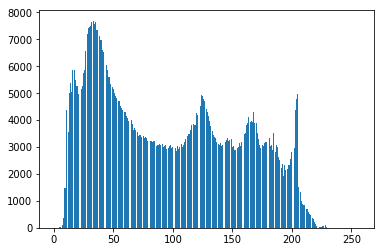